# **Data Import**

In [25]:
import pandas as pd
import numpy as np

Looking at the zipfile

In [26]:
import zipfile
# python module used to open, read and extraxt from zipfiles

with zipfile.ZipFile('t20s_male_csv2.zip', 'r') as all_it20s:
# turn the zipfile into an object so we can do some stuff wirh it
  it20s_namelist = all_it20s.namelist()
  print(it20s_namelist[:10])



['README.txt', '211048.csv', '211048_info.csv', '211028.csv', '211028_info.csv', '222678.csv', '222678_info.csv', '226374.csv', '226374_info.csv', '237242.csv']


In [27]:
len(it20s_namelist)

5241

In [28]:
with zipfile.ZipFile('t20s_male_csv2.zip', 'r') as all_it20s: # have to use zoipfile each time to access the zip
    with all_it20s.open('211048_info.csv') as f:
        lines = f.readlines()
        for i, line in enumerate(lines[:10], 1):
            print(f"Line {i}: {line.decode('utf-8').strip()}")
# utf-8 decode turn it from byte string to normal string, as we have different number of columns in some of the rows

Line 1: version,2.1.0
Line 2: info,balls_per_over,6
Line 3: info,team,New Zealand
Line 4: info,team,Australia
Line 5: info,gender,male
Line 6: info,season,2004/05
Line 7: info,date,2005/02/17
Line 8: info,venue,Eden Park
Line 9: info,city,Auckland
Line 10: info,toss_winner,Australia


Want to only include games between Eng and Aus

The info files contain what teams are playing

In [29]:
it20s_info_files = [f for f in it20s_namelist if f.endswith('_info.csv')]
# using [] to create a list of every file in the filelist that ends in _info.csv
print(len(it20s_info_files))

2620


Half the files have _info at the end which is what we want. Also -1 for the README file

In [30]:
eng_vs_aus_matches = []

with zipfile.ZipFile('t20s_male_csv2.zip', 'r') as all_it20s:
    for f in it20s_info_files:
        with all_it20s.open(f) as file:
            lines = file.readlines()
            line3 = lines[2].decode('utf-8')
            line4 = lines[3].decode('utf-8')
            # lines 2 and 3 actually 3 and 4 with 0 index
            # decode each line from byte to string

            if "England" in line3 and "Australia" in line4 or \
               "Australia" in line3 and "England" in line4:# check both orders aus/eng and eng/aus
                eng_vs_aus_matches.append(f)
# gives list with info docs that are between eng and aus

In [31]:
print(len(eng_vs_aus_matches))

26


In [32]:
match_ids = [f.replace('_info.csv', '') for f in eng_vs_aus_matches]
print(match_ids)
# gives me all the match ids for t20Is between E and A, now need to make a file with these in

['211028', '249227', '287861', '350050', '412703', '446960', '446961', '566937', '566938', '636164', '636165', '636166', '743975', '1072317', '1072318', '1119542', '1198235', '1198236', '1198237', '1273737', '1317486', '1317487', '1317488', '1415717', '1385697', '1385698']


In [33]:
files_to_include = []
for mid in match_ids:
  files_to_include.append(f"{mid}.csv")
  files_to_include.append(f"{mid}_info.csv")

#use f string to insert

In [34]:
source_zip = 't20s_male_csv2.zip'
output_zip = 'eng_aus_matches_only.zip'

with zipfile.ZipFile(source_zip, 'r') as zin:
    with zipfile.ZipFile(output_zip, 'w') as zout:
        for f in files_to_include:
            data = zin.read(f)
            zout.writestr(f, data)


In [35]:
with zipfile.ZipFile("eng_aus_matches_only.zip", "r") as zip_ref:
    zip_ref.printdir()
# list the files in the zip

File Name                                             Modified             Size
211028.csv                                     2025-08-25 07:34:38        23981
211028_info.csv                                2025-08-25 07:34:38         2161
249227.csv                                     2025-08-25 07:34:38        29907
249227_info.csv                                2025-08-25 07:34:38         2232
287861.csv                                     2025-08-25 07:34:38        22655
287861_info.csv                                2025-08-25 07:34:38         2268
350050.csv                                     2025-08-25 07:34:38        14547
350050_info.csv                                2025-08-25 07:34:38         2223
412703.csv                                     2025-08-25 07:34:38        28866
412703_info.csv                                2025-08-25 07:34:38         2273
446960.csv                                     2025-08-25 07:34:38        26808
446960_info.csv                         

# **Intial Feature Engineering**


1.   These features arer going to be very basic and got from the existing CSV
2.   The initial df for one match id




When setting up ypu dataframe to be suitable for the TFT model I need a

1.   Group ID, to identify each independent sequence = .ID
2.   Time index, to provide temporal structure to each independent sequence = .TIME
3.   Features: These can be Static variables, past variables, future known variables
4.   Target Variable coulumns, what I am trying to predict  .TARGET










In [36]:
with zipfile.ZipFile("eng_aus_matches_only.zip", "r") as zip_ref:
    with zip_ref.open("211028.csv") as file:
        df_2011028 = pd.read_csv(file)
# taking one eng aus game and converting the ball by ball csv into a pd df

In [37]:
df_2011028.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add **group ID** for TFT model

In [38]:
# add match id and innings column as TFT expects a group id to identify independent sequences, each innings is different even if they are same match
df_2011028['match_id_innings'] = df_2011028['match_id'].astype(str)+'_'+df_2011028['innings'].astype(str)

df_2011028.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1


Add **time index** for TFT model

In [39]:
df_2011028['time_idx'] = df_2011028.groupby('match_id_innings').cumcount() + 1

df_2011028.head(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5
5,211028,2005,2005-06-13,The Rose Bowl,1,0.6,England,Australia,GO Jones,ME Trescothick,B Lee,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,6
6,211028,2005,2005-06-13,The Rose Bowl,1,0.7,England,Australia,GO Jones,ME Trescothick,B Lee,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,7
7,211028,2005,2005-06-13,The Rose Bowl,1,1.1,England,Australia,ME Trescothick,GO Jones,GD McGrath,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,8
8,211028,2005,2005-06-13,The Rose Bowl,1,1.2,England,Australia,ME Trescothick,GO Jones,GD McGrath,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,9
9,211028,2005,2005-06-13,The Rose Bowl,1,1.3,England,Australia,ME Trescothick,GO Jones,GD McGrath,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,10


Add total_runs as a simple Target Variable

In [40]:
df_2011028['total_runs_off_ball'] = df_2011028['runs_off_bat'].astype(int) + df_2011028['extras'].astype(int)
df_2011028.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0


Add cumulative runs

In [41]:
df_2011028['cum_runs'] = df_2011028.groupby('match_id_innings')['total_runs_off_ball'].cumsum()
df_2011028.head(15)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0,0
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1,1
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0,1
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0,1
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0,1
5,211028,2005,2005-06-13,The Rose Bowl,1,0.6,England,Australia,GO Jones,ME Trescothick,B Lee,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,6,1,2
6,211028,2005,2005-06-13,The Rose Bowl,1,0.7,England,Australia,GO Jones,ME Trescothick,B Lee,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,7,2,4
7,211028,2005,2005-06-13,The Rose Bowl,1,1.1,England,Australia,ME Trescothick,GO Jones,GD McGrath,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,8,0,4
8,211028,2005,2005-06-13,The Rose Bowl,1,1.2,England,Australia,ME Trescothick,GO Jones,GD McGrath,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,9,0,4
9,211028,2005,2005-06-13,The Rose Bowl,1,1.3,England,Australia,ME Trescothick,GO Jones,GD McGrath,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,10,1,5


Add cumulative wickets

In [42]:
df_2011028['is_wicket'] = df_2011028['wicket_type'].notna().astype(int)
# not na, check if there is a nan value or something else, then as type turns to integer rather than t/f
df_2011028['cum_wickets'] = df_2011028.groupby('match_id_innings')['is_wicket'].cumsum()
# can now count number of wickets
df_2011028.head(100)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0,0,0,0
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1,1,0,0
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0,1,0,0
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0,1,0,0
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,211028,2005,2005-06-13,The Rose Bowl,1,15.2,England,Australia,PD Collingwood,AJ Strauss,A Symonds,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,96,1,126,0,5
96,211028,2005,2005-06-13,The Rose Bowl,1,15.3,England,Australia,AJ Strauss,PD Collingwood,A Symonds,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,97,0,126,0,5
97,211028,2005,2005-06-13,The Rose Bowl,1,15.4,England,Australia,AJ Strauss,PD Collingwood,A Symonds,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,98,1,127,0,5
98,211028,2005,2005-06-13,The Rose Bowl,1,15.5,England,Australia,PD Collingwood,AJ Strauss,A Symonds,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,99,4,131,0,5


Add lagged feature that shows runs from the previous 3 balls

In [43]:
df_2011028['runs_prev_3'] = (
    df_2011028.groupby('match_id_innings')['total_runs_off_ball']
      .apply(lambda s: s.shift(1).rolling(window=3, min_periods=3).sum())
      .reset_index(level=0, drop=True)
      .fillna(0)
      .astype(int)
)
# was originally returning a float as there was nan values for the first 3 balls. However, I have set it to zero. This is because this feature is to give an idea of momentum and at start of the innings there is little momentum so zero will have low impact. Also as we have time_idx the model woll recognise these balls as being early in the innings.
df_2011028.head(15)

# this is actually the runs in the 4th last ball, so need to add the last 2 balls to this
# fixed 

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0,0,0,0,0
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1,1,0,0,0
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0,1,0,0,0
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0,1,0,0,1
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0,1,0,0,1
5,211028,2005,2005-06-13,The Rose Bowl,1,0.6,England,Australia,GO Jones,ME Trescothick,B Lee,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,6,1,2,0,0,0
6,211028,2005,2005-06-13,The Rose Bowl,1,0.7,England,Australia,GO Jones,ME Trescothick,B Lee,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,7,2,4,0,0,1
7,211028,2005,2005-06-13,The Rose Bowl,1,1.1,England,Australia,ME Trescothick,GO Jones,GD McGrath,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,8,0,4,0,0,3
8,211028,2005,2005-06-13,The Rose Bowl,1,1.2,England,Australia,ME Trescothick,GO Jones,GD McGrath,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,9,0,4,0,0,3
9,211028,2005,2005-06-13,The Rose Bowl,1,1.3,England,Australia,ME Trescothick,GO Jones,GD McGrath,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,10,1,5,0,0,2


Create over number so we can do powerplay and death overs

In [44]:
df_2011028['over_number'] = df_2011028['ball'].apply(lambda x: int(x) + 1)
df_2011028.head(146)
# look at 146 as there was an over with a noball and was checking that it work even if there was more than 6 balls in the over and it did.

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0,0,0,0,0,1
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1,1,0,0,0,1
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0,1,0,0,0,1
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0,1,0,0,1,1
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,211028,2005,2005-06-13,The Rose Bowl,2,2.5,Australia,England,AC Gilchrist,ML Hayden,D Gough,0,0,NaN,NaN,NaN,NaN,NaN,caught,AC Gilchrist,NaN,NaN,211028_2,17,0,23,1,1,4,3
142,211028,2005,2005-06-13,The Rose Bowl,2,2.6,Australia,England,ML Hayden,A Symonds,D Gough,0,0,NaN,NaN,NaN,NaN,NaN,caught,ML Hayden,NaN,NaN,211028_2,18,0,23,1,2,3,3
143,211028,2005,2005-06-13,The Rose Bowl,2,2.7,Australia,England,A Symonds,MJ Clarke,D Gough,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,19,0,23,0,2,2,3
144,211028,2005,2005-06-13,The Rose Bowl,2,3.1,Australia,England,MJ Clarke,A Symonds,J Lewis,0,0,NaN,NaN,NaN,NaN,NaN,caught,MJ Clarke,NaN,NaN,211028_2,20,0,23,1,3,0,4


In [45]:
#powerplayer <= 6 and death overs >= 17
df_2011028['powerplay']=(df_2011028['over_number']<=6).astype(int)
df_2011028['death_overs']=(df_2011028['over_number']>=17).astype(int)
df_2011028.head(120)

# during the powerplay teams are only allowed 2 fielders outside of the 30 yard circle
# for the remaining overs you are not allowed more than 5 fielders outside the ring
# the last 4 overs are considered the death overs and bowling style is known to change, bowlers tend to try variations i.e slower balls to prevent batsmen scoring

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0,0,0,0,0,1,1,0
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1,1,0,0,0,1,1,0
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0,1,0,0,0,1,1,0
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0,1,0,0,1,1,1,0
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,211028,2005,2005-06-13,The Rose Bowl,1,18.3,England,Australia,VS Solanki,PD Collingwood,JN Gillespie,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,116,1,159,0,6,2,19,0,1
116,211028,2005,2005-06-13,The Rose Bowl,1,18.4,England,Australia,PD Collingwood,VS Solanki,JN Gillespie,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,117,0,159,0,6,2,19,0,1
117,211028,2005,2005-06-13,The Rose Bowl,1,18.5,England,Australia,PD Collingwood,VS Solanki,JN Gillespie,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,118,4,163,0,6,1,19,0,1
118,211028,2005,2005-06-13,The Rose Bowl,1,18.6,England,Australia,PD Collingwood,VS Solanki,JN Gillespie,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,119,4,167,0,6,5,19,0,1


Add some static features from the info file
1. doing this basically now, will need to make a mother file with all info and link stuff we want to match_id

In [46]:
info_dict_2011028 = {}

with zipfile.ZipFile("eng_aus_matches_only.zip", "r") as zip_ref:
    with zip_ref.open("211028_info.csv") as f:
        for line in f:
            parts = line.decode('utf-8').strip().split(",")
            if len(parts) == 3 and parts[0] == "info":
                key = parts[1].strip()
                value = parts[2].strip()
                info_dict_2011028[key] = value

# create empty dict and then we can add key value pairs with the information I want

In [47]:
#set what we want
for key in ['city', 'toss_winner', 'toss_decision']:
  df_2011028[key] = info_dict_2011028[key]
  df_2011028.head(5)

In [48]:
pd.set_option('display.max_columns', None)
df_2011028.head()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,city,toss_winner,toss_decision
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0,0,0,0,0,1,1,0,Southampton,England,bat
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1,1,0,0,0,1,1,0,Southampton,England,bat
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0,1,0,0,0,1,1,0,Southampton,England,bat
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0,1,0,0,1,1,1,0,Southampton,England,bat
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0,1,0,0,1,1,1,0,Southampton,England,bat


Add CRR and RRR 

In [49]:
df_2011028['legal_delivery'] = ((df_2011028['wides'].fillna(0) == 0) & (df_2011028['noballs'].fillna(0) == 0)).astype(int)
df_2011028['legal_delivery_number'] = df_2011028.groupby('match_id_innings')['legal_delivery'].cumsum()
df_2011028['balls_remaining'] = 120 - df_2011028['legal_delivery_number']


In [50]:
df_2011028['crr'] = np.where(
    df_2011028['legal_delivery_number'] > 0,           # at least one legal ball faced
    6.0 * df_2011028['cum_runs'] / df_2011028['legal_delivery_number'],
    0.0                                        # before first legal ball (e.g., early wides/no-balls)
)


In [51]:
df_2011028.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,crr
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0,0,0,0,0,1,1,0,Southampton,England,bat,1,1,119,0.0
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1,1,0,0,0,1,1,0,Southampton,England,bat,1,2,118,3.0
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0,1,0,0,0,1,1,0,Southampton,England,bat,1,3,117,2.0
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0,1,0,0,1,1,1,0,Southampton,England,bat,1,4,116,1.5
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0,1,0,0,1,1,1,0,Southampton,England,bat,1,5,115,1.2


In [52]:
df_2011028.tail(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,crr
210,211028,2005,2005-06-13,The Rose Bowl,2,13.5,Australia,England,GD McGrath,MS Kasprowicz,A Flintoff,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,86,0,78,0,9,0,14,0,0,Southampton,England,bat,1,83,37,5.638554
211,211028,2005,2005-06-13,The Rose Bowl,2,13.6,Australia,England,GD McGrath,MS Kasprowicz,A Flintoff,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,87,1,79,0,9,0,14,0,0,Southampton,England,bat,1,84,36,5.642857
212,211028,2005,2005-06-13,The Rose Bowl,2,14.1,Australia,England,GD McGrath,MS Kasprowicz,SJ Harmison,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,88,0,79,0,9,1,15,0,0,Southampton,England,bat,1,85,35,5.576471
213,211028,2005,2005-06-13,The Rose Bowl,2,14.2,Australia,England,GD McGrath,MS Kasprowicz,SJ Harmison,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,89,0,79,0,9,1,15,0,0,Southampton,England,bat,1,86,34,5.511628
214,211028,2005,2005-06-13,The Rose Bowl,2,14.3,Australia,England,GD McGrath,MS Kasprowicz,SJ Harmison,0,0,NaN,NaN,NaN,NaN,NaN,bowled,GD McGrath,NaN,NaN,211028_2,90,0,79,1,10,1,15,0,0,Southampton,England,bat,1,87,33,5.448276


In [53]:
first_total = df_2011028.loc[df_2011028['innings'] == 1, 'cum_runs'].max()

if pd.notna(first_total):
    target_to_win = first_total + 1
    mask2 = (df_2011028['innings'] == 2)

    # These columns will only be populated for inns 2; they’ll be NaN for inns 1
    df_2011028.loc[mask2, 'target_to_win'] = target_to_win
    df_2011028.loc[mask2, 'req_runs'] = np.maximum(target_to_win - df_2011028.loc[mask2, 'cum_runs'], 0).astype(int)

    req_balls = df_2011028.loc[mask2, 'balls_remaining']
    df_2011028.loc[mask2, 'rrr'] = np.where(req_balls > 0,
                                    6.0 * df_2011028.loc[mask2, 'req_runs'] / req_balls,
                                    0.0)
    # Clamp RRR to 0 once the target is met
    df_2011028.loc[mask2 & (df_2011028['req_runs'] == 0), 'rrr'] = 0.0

# By choice: set RRR to 0 in innings 1
df_2011028.loc[df_2011028['innings'] == 1, 'rrr'] = 0.0

In [54]:
df_2011028.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,crr,target_to_win,req_runs,rrr
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0,0,0,0,0,1,1,0,Southampton,England,bat,1,1,119,0.0,NaN,NaN,0.0
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1,1,0,0,0,1,1,0,Southampton,England,bat,1,2,118,3.0,NaN,NaN,0.0
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0,1,0,0,0,1,1,0,Southampton,England,bat,1,3,117,2.0,NaN,NaN,0.0
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0,1,0,0,1,1,1,0,Southampton,England,bat,1,4,116,1.5,NaN,NaN,0.0
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0,1,0,0,1,1,1,0,Southampton,England,bat,1,5,115,1.2,NaN,NaN,0.0


In [55]:
df_2011028.tail(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,crr,target_to_win,req_runs,rrr
205,211028,2005,2005-06-13,The Rose Bowl,2,12.6,Australia,England,GD McGrath,MS Kasprowicz,PD Collingwood,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,81,1,78,0,9,4,13,0,0,Southampton,England,bat,1,78,42,6.000000,180.0,102.0,14.571429
206,211028,2005,2005-06-13,The Rose Bowl,2,13.1,Australia,England,GD McGrath,MS Kasprowicz,A Flintoff,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,82,0,78,0,9,5,14,0,0,Southampton,England,bat,1,79,41,5.924051,180.0,102.0,14.926829
207,211028,2005,2005-06-13,The Rose Bowl,2,13.2,Australia,England,GD McGrath,MS Kasprowicz,A Flintoff,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,83,0,78,0,9,2,14,0,0,Southampton,England,bat,1,80,40,5.850000,180.0,102.0,15.300000
208,211028,2005,2005-06-13,The Rose Bowl,2,13.3,Australia,England,GD McGrath,MS Kasprowicz,A Flintoff,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,84,0,78,0,9,1,14,0,0,Southampton,England,bat,1,81,39,5.777778,180.0,102.0,15.692308
209,211028,2005,2005-06-13,The Rose Bowl,2,13.4,Australia,England,GD McGrath,MS Kasprowicz,A Flintoff,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,85,0,78,0,9,0,14,0,0,Southampton,England,bat,1,82,38,5.707317,180.0,102.0,16.105263
210,211028,2005,2005-06-13,The Rose Bowl,2,13.5,Australia,England,GD McGrath,MS Kasprowicz,A Flintoff,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,86,0,78,0,9,0,14,0,0,Southampton,England,bat,1,83,37,5.638554,180.0,102.0,16.540541
211,211028,2005,2005-06-13,The Rose Bowl,2,13.6,Australia,England,GD McGrath,MS Kasprowicz,A Flintoff,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,87,1,79,0,9,0,14,0,0,Southampton,England,bat,1,84,36,5.642857,180.0,101.0,16.833333
212,211028,2005,2005-06-13,The Rose Bowl,2,14.1,Australia,England,GD McGrath,MS Kasprowicz,SJ Harmison,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,88,0,79,0,9,1,15,0,0,Southampton,England,bat,1,85,35,5.576471,180.0,101.0,17.314286
213,211028,2005,2005-06-13,The Rose Bowl,2,14.2,Australia,England,GD McGrath,MS Kasprowicz,SJ Harmison,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,89,0,79,0,9,1,15,0,0,Southampton,England,bat,1,86,34,5.511628,180.0,101.0,17.823529
214,211028,2005,2005-06-13,The Rose Bowl,2,14.3,Australia,England,GD McGrath,MS Kasprowicz,SJ Harmison,0,0,NaN,NaN,NaN,NaN,NaN,bowled,GD McGrath,NaN,NaN,211028_2,90,0,79,1,10,1,15,0,0,Southampton,England,bat,1,87,33,5.448276,180.0,101.0,18.363636


# **Eng/Aus Pipeline**

### Input features

Now add all those features I've added to a dataframe for all the eng and aus matches

In [56]:
# function tp add all the features i have already created
def process_match(ball_df, info_dict):
    df = ball_df.copy()

    # match_id_innings
    df['match_id_innings'] = df['match_id'].astype(str) + "_" + df['innings'].astype(str)
    # time_idx
    df['time_idx'] = df.groupby('match_id_innings').cumcount() + 1
    # Total runs off ball
    df['total_runs_off_ball'] = df['runs_off_bat'] + df['extras']
    # Cumulative runs
    df['cum_runs'] = df.groupby('match_id_innings')['total_runs_off_ball'].cumsum()
    # wickets
    df['is_wicket'] = df['wicket_type'].notna().astype(int)
    df['cum_wickets'] = df.groupby('match_id_innings')['is_wicket'].cumsum()
    # previous 3 balls
    df['runs_prev_3'] = df.groupby('match_id_innings')['total_runs_off_ball'].shift(3).fillna(0).astype(int)
    # Over number
    df['over_number'] = df['ball'].apply(lambda x: int(x) + 1)
    # Powerplay and death overs
    df['powerplay'] = (df['over_number'] <= 6).astype(int)
    df['death_overs'] = (df['over_number'] >= 17).astype(int)

    # Balls remaing
    #legal delivery column, cum count it then subtract from 120
    df['legal_delivery'] = ((df['wides'].fillna(0) == 0) & (df['noballs'].fillna(0) == 0)).astype(int)
    df['legal_delivery_number'] = df.groupby('match_id_innings')['legal_delivery'].cumsum()
    df['balls_remaining'] = 120 - df['legal_delivery_number']


    # Static covariates from info file
    for key in ['city', 'toss_winner', 'toss_decision']:
        df[key] = info_dict.get(key, None)


    return df



In [57]:
zip_path = "eng_aus_matches_only.zip"

all_eng_aus_matches = []

# Open the zip file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    for match_id in match_ids:
        ball_file = f"{match_id}.csv"
        info_file = f"{match_id}_info.csv"

        with zip_ref.open(ball_file) as f:
            ball_df = pd.read_csv(f)
            # look at the ball by ball file

        info_dict = {}
        with zip_ref.open(info_file) as f:
            for line in f:
                parts = line.decode('utf-8').strip().split(",")
                if len(parts) == 3 and parts[0] == "info":
                    key = parts[1].strip()
                    value = parts[2].strip()
                    info_dict[key] = value
                    # parse the info file for static covariates

        processed_df = process_match(ball_df, info_dict)
        all_eng_aus_matches.append(processed_df)

df_all_eng_aus = pd.concat(all_eng_aus_matches, ignore_index=True)

df_all_eng_aus.head(127)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,legal_delivery,legal_delivery_number,balls_remaining,city,toss_winner,toss_decision
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0,0,0,0,0,1,1,0,1,1,119,Southampton,England,bat
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1,1,0,0,0,1,1,0,1,2,118,Southampton,England,bat
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0,1,0,0,0,1,1,0,1,3,117,Southampton,England,bat
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0,1,0,0,0,1,1,0,1,4,116,Southampton,England,bat
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0,1,0,0,1,1,1,0,1,5,115,Southampton,England,bat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,211028,2005,2005-06-13,The Rose Bowl,1,19.4,England,Australia,VS Solanki,PD Collingwood,GD McGrath,0,0,NaN,NaN,NaN,NaN,NaN,caught,VS Solanki,NaN,NaN,211028_1,123,0,175,1,7,2,20,0,1,1,118,2,Southampton,England,bat
123,211028,2005,2005-06-13,The Rose Bowl,1,19.5,England,Australia,PD Collingwood,J Lewis,GD McGrath,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,124,4,179,0,7,4,20,0,1,1,119,1,Southampton,England,bat
124,211028,2005,2005-06-13,The Rose Bowl,1,19.6,England,Australia,PD Collingwood,J Lewis,GD McGrath,0,0,NaN,NaN,NaN,NaN,NaN,caught,PD Collingwood,NaN,NaN,211028_1,125,0,179,1,8,2,20,0,1,1,120,0,Southampton,England,bat
125,211028,2005,2005-06-13,The Rose Bowl,2,0.1,Australia,England,AC Gilchrist,ML Hayden,D Gough,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_2,1,0,0,0,0,0,1,1,0,1,1,119,Southampton,England,bat


Lets do some idiot checks!

In [58]:
#number of unique match ids, there should be 26...
df_all_eng_aus['match_id'].nunique()

# lets go

26

In [59]:
# balls per match
df_all_eng_aus['match_id'].value_counts()

#all look about right, the shorter games are due to match abadonment and domination

match_id
1317486    255
1317487    254
636164     251
1415717    251
566937     250
566938     249
249227     249
1198235    248
743975     246
446961     245
1119542    245
1385697    245
446960     244
1385698    244
1198237    243
1198236    239
1072317    238
412703     231
636166     230
1072318    218
211028     215
636165     214
287861     212
1273737    197
350050     136
1317488    100
Name: count, dtype: int64

In [60]:
df_all_eng_aus[df_all_eng_aus['match_id'] == 350050].head()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,legal_delivery,legal_delivery_number,balls_remaining,city,toss_winner,toss_decision
676,350050,2009,2009-08-30,Old Trafford,1,0.1,Australia,England,SR Watson,DA Warner,JM Anderson,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350050_1,1,0,0,0,0,0,1,1,0,1,1,119,Manchester,England,field
677,350050,2009,2009-08-30,Old Trafford,1,0.2,Australia,England,SR Watson,DA Warner,JM Anderson,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350050_1,2,1,1,0,0,0,1,1,0,1,2,118,Manchester,England,field
678,350050,2009,2009-08-30,Old Trafford,1,0.3,Australia,England,DA Warner,SR Watson,JM Anderson,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350050_1,3,2,3,0,0,0,1,1,0,1,3,117,Manchester,England,field
679,350050,2009,2009-08-30,Old Trafford,1,0.4,Australia,England,DA Warner,SR Watson,JM Anderson,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350050_1,4,0,3,0,0,0,1,1,0,1,4,116,Manchester,England,field
680,350050,2009,2009-08-30,Old Trafford,1,0.5,Australia,England,DA Warner,SR Watson,JM Anderson,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350050_1,5,1,4,0,0,1,1,1,0,0,4,116,Manchester,England,field


In [61]:
df_all_eng_aus[df_all_eng_aus['match_id_innings'] == '211028_1'][['time_idx', 'ball', 'legal_delivery', 'legal_delivery_number', 'balls_remaining']].tail(10)
# looks like balls_remaining works

,time_idx,ball,legal_delivery,legal_delivery_number,balls_remaining
115,116,18.3,1,111,9
116,117,18.4,1,112,8
117,118,18.5,1,113,7
118,119,18.6,1,114,6
119,120,19.1,1,115,5
120,121,19.2,1,116,4
121,122,19.3,1,117,3
122,123,19.4,1,118,2
123,124,19.5,1,119,1
124,125,19.6,1,120,0


### Target Variables
Add target variables to the process match function

In [62]:
# function tp add all the features i have already created
def process_match(ball_df, info_dict):
    df = ball_df.copy()

    # match_id_innings
    df['match_id_innings'] = df['match_id'].astype(str) + "_" + df['innings'].astype(str)
    # time_idx
    df['time_idx'] = df.groupby('match_id_innings').cumcount() + 1
    # Total runs off ball
    df['total_runs_off_ball'] = df['runs_off_bat'] + df['extras']
    # Cumulative runs
    df['cum_runs'] = df.groupby('match_id_innings')['total_runs_off_ball'].cumsum()
    # wickets
    df['is_wicket'] = df['wicket_type'].notna().astype(int)
    df['cum_wickets'] = df.groupby('match_id_innings')['is_wicket'].cumsum()
    # previous 3 balls
    df['runs_prev_3'] = df.groupby('match_id_innings')['total_runs_off_ball'].shift(3).fillna(0).astype(int)
    # Over number
    df['over_number'] = df['ball'].apply(lambda x: int(x) + 1)
    # Powerplay and death overs
    df['powerplay'] = (df['over_number'] <= 6).astype(int)
    df['death_overs'] = (df['over_number'] >= 17).astype(int)

    # Static covariates from info file
    for key in ['city', 'toss_winner', 'toss_decision']:
        df[key] = info_dict.get(key, None)
    # Balls remaining
    #legal delivery column, cum count it then subtract from 120
    df['legal_delivery'] = ((df['wides'].fillna(0) == 0) & (df['noballs'].fillna(0) == 0)).astype(int)
    df['legal_delivery_number'] = df.groupby('match_id_innings')['legal_delivery'].cumsum()
    df['balls_remaining'] = 120 - df['legal_delivery_number']

    # add target variables
    # One-hot encoded runs
    for i in [0, 1, 2, 3, 4, 6]:
        df[f'rob_{i}'] = (df['runs_off_bat'] == i).astype(int)

    # Added this just so I have all target varibales together can delete is_wicket later
    df['wicket'] = df['is_wicket']

    # make extras binary not a value
    df['extra'] = (df['extras'] > 0).astype(int)

    # "Other" = not a given run, wicket, or extra. There is some wierd things that happen in cricketgames so I will have this as failsafe
    df['other'] = (
        (df[[f'rob_{i}' for i in [0,1,2,3,4,6]]].sum(axis=1) == 0) &
        (df['wicket'] == 0) &
        (df['extra'] == 0)
    ).astype(int)

  



    return df


Update df

In [63]:
zip_path = "eng_aus_matches_only.zip"

all_eng_aus_matches = []

# Open the zip file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    for match_id in match_ids:
        ball_file = f"{match_id}.csv"
        info_file = f"{match_id}_info.csv"

        with zip_ref.open(ball_file) as f:
            ball_df = pd.read_csv(f)
            # look at the ball by ball file

        info_dict = {}
        with zip_ref.open(info_file) as f:
            for line in f:
                parts = line.decode('utf-8').strip().split(",")
                if len(parts) == 3 and parts[0] == "info":
                    key = parts[1].strip()
                    value = parts[2].strip()
                    info_dict[key] = value
                    # parse the info file for static covariates

        processed_df = process_match(ball_df, info_dict)
        all_eng_aus_matches.append(processed_df)

df_all_eng_aus = pd.concat(all_eng_aus_matches, ignore_index=True)

df_all_eng_aus.head()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,rob_0,rob_1,rob_2,rob_3,rob_4,rob_6,wicket,extra,other
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0,0,0,0,0,1,1,0,Southampton,England,bat,1,1,119,1,0,0,0,0,0,0,0,0
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1,1,0,0,0,1,1,0,Southampton,England,bat,1,2,118,0,1,0,0,0,0,0,0,0
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0,1,0,0,0,1,1,0,Southampton,England,bat,1,3,117,1,0,0,0,0,0,0,0,0
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0,1,0,0,0,1,1,0,Southampton,England,bat,1,4,116,1,0,0,0,0,0,0,0,0
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0,1,0,0,1,1,1,0,Southampton,England,bat,1,5,115,1,0,0,0,0,0,0,0,0


In [64]:
# look how many instances there are of each one
df_all_eng_aus[['rob_0', 'rob_1', 'rob_2', 'rob_3', 'rob_4', 'rob_6', 'wicket', 'extra', 'other']].sum()


rob_0     2290
rob_1     2104
rob_2      501
rob_3       44
rob_4      702
rob_6      307
wicket     329
extra      315
other        1
dtype: int64

In [65]:
a = 2290+2104+501+44+702+307+329+315+1
print(a)

6593


In [66]:
len(df_all_eng_aus)

5949

The no. of istances and lentgh of df are different because some balls are runs of bat and extras i.e hit a four off a no-ball. Need to work out what I am going to do here.

In [67]:
df_all_eng_aus[df_all_eng_aus['other'] == 1]

# the one instance of other... travis head hit 5 off the bat!

# why is there 97 balls remaining when its delivery 3.6?
# must of been a wide/no-ball in the over... lets have a look

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,rob_0,rob_1,rob_2,rob_3,rob_4,rob_6,wicket,extra,other
3574,1119542,2018,2018-06-27,Edgbaston,2,3.6,Australia,England,TM Head,AJ Finch,CJ Jordan,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1119542_2,25,5,38,0,2,1,4,1,0,Birmingham,Australia,field,1,23,97,0,0,0,0,0,0,0,0,1


In [68]:
df_all_eng_aus[
    (df_all_eng_aus['match_id'] == 1119542) &
    (df_all_eng_aus['innings'] == 2) &
    (df_all_eng_aus['ball'].astype(str).str.startswith('3.'))
]
# yes ball 3 was a no ball

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,rob_0,rob_1,rob_2,rob_3,rob_4,rob_6,wicket,extra,other
3569,1119542,2018,2018-06-27,Edgbaston,2,3.1,Australia,England,GJ Maxwell,AJ Finch,CJ Jordan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1119542_2,20,2,26,0,1,1,4,1,0,Birmingham,Australia,field,1,19,101,0,0,1,0,0,0,0,0,0
3570,1119542,2018,2018-06-27,Edgbaston,2,3.2,Australia,England,GJ Maxwell,AJ Finch,CJ Jordan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1119542_2,21,2,28,0,1,1,4,1,0,Birmingham,Australia,field,1,20,100,0,0,1,0,0,0,0,0,0
3571,1119542,2018,2018-06-27,Edgbaston,2,3.3,Australia,England,GJ Maxwell,AJ Finch,CJ Jordan,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1119542_2,22,1,29,0,1,4,4,1,0,Birmingham,Australia,field,0,20,100,1,0,0,0,0,0,0,1,0
3572,1119542,2018,2018-06-27,Edgbaston,2,3.4,Australia,England,GJ Maxwell,AJ Finch,CJ Jordan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1119542_2,23,4,33,0,1,2,4,1,0,Birmingham,Australia,field,1,21,99,0,0,0,0,1,0,0,0,0
3573,1119542,2018,2018-06-27,Edgbaston,2,3.5,Australia,England,GJ Maxwell,AJ Finch,CJ Jordan,0,0,NaN,NaN,NaN,NaN,NaN,bowled,GJ Maxwell,NaN,NaN,1119542_2,24,0,33,1,2,2,4,1,0,Birmingham,Australia,field,1,22,98,1,0,0,0,0,0,1,0,0
3574,1119542,2018,2018-06-27,Edgbaston,2,3.6,Australia,England,TM Head,AJ Finch,CJ Jordan,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1119542_2,25,5,38,0,2,1,4,1,0,Birmingham,Australia,field,1,23,97,0,0,0,0,0,0,0,0,1
3575,1119542,2018,2018-06-27,Edgbaston,2,3.7,Australia,England,AJ Finch,TM Head,CJ Jordan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1119542_2,26,1,39,0,2,4,4,1,0,Birmingham,Australia,field,1,24,96,0,1,0,0,0,0,0,0,0


In [69]:
df_all_eng_aus[df_all_eng_aus['other_player_dismissed'].notna()]
# no instances of two wickets on one ball
# looking at the rules it is not possible for this to happen

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,rob_0,rob_1,rob_2,rob_3,rob_4,rob_6,wicket,extra,other


In [70]:
df_all_eng_aus.shape

(5949, 47)

In [71]:
df_all_eng_aus

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,rob_0,rob_1,rob_2,rob_3,rob_4,rob_6,wicket,extra,other
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0,0,0,0,0,1,1,0,Southampton,England,bat,1,1,119,1,0,0,0,0,0,0,0,0
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1,1,0,0,0,1,1,0,Southampton,England,bat,1,2,118,0,1,0,0,0,0,0,0,0
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0,1,0,0,0,1,1,0,Southampton,England,bat,1,3,117,1,0,0,0,0,0,0,0,0
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0,1,0,0,0,1,1,0,Southampton,England,bat,1,4,116,1,0,0,0,0,0,0,0,0
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0,1,0,0,1,1,1,0,Southampton,England,bat,1,5,115,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5944,1385698,2024,2024-09-13,"Sophia Gardens, Cardiff",2,18.3,England,Australia,LS Livingstone,J Overton,MW Short,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1385698_2,116,1,189,0,5,2,19,0,1,Cardiff,England,field,0,110,10,1,0,0,0,0,0,0,1,0
5945,1385698,2024,2024-09-13,"Sophia Gardens, Cardiff",2,18.4,England,Australia,LS Livingstone,J Overton,MW Short,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1385698_2,117,4,193,0,5,1,19,0,1,Cardiff,England,field,1,111,9,0,0,0,0,1,0,0,0,0
5946,1385698,2024,2024-09-13,"Sophia Gardens, Cardiff",2,18.5,England,Australia,LS Livingstone,J Overton,MW Short,0,0,NaN,NaN,NaN,NaN,NaN,bowled,LS Livingstone,NaN,NaN,1385698_2,118,0,193,1,6,6,19,0,1,Cardiff,England,field,1,112,8,1,0,0,0,0,0,1,0,0
5947,1385698,2024,2024-09-13,"Sophia Gardens, Cardiff",2,18.6,England,Australia,BA Carse,J Overton,MW Short,0,0,NaN,NaN,NaN,NaN,NaN,caught,BA Carse,NaN,NaN,1385698_2,119,0,193,1,7,1,19,0,1,Cardiff,England,field,1,113,7,1,0,0,0,0,0,1,0,0


# **Setting up simple TFT**

I now need to define and split my varibales into 4 groups so that it is suitable for the DARTS documentation
1. Target
2. Past covariates
3. Future Covariates
4. Static covariates

Then we can convert to darts.timeseries objects

Each TimeSeries object is a sequence of data points (balls) within that specific innings

### Imports

In [72]:
!pip install darts


In [73]:
from darts import TimeSeries
from darts.models import TFTModel
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.dataprocessing.transformers import Scaler
from darts.utils.likelihood_models.torch import QuantileRegression
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


In [74]:
df_all_eng_aus.head(0)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,rob_0,rob_1,rob_2,rob_3,rob_4,rob_6,wicket,extra,other


In [75]:
# specify which columns to extract from the master df
target_cols = ['rob_0', 'rob_1', 'rob_2', 'rob_3', 'rob_4', 'rob_6', 'wicket', 'extra', 'other']
past_cov_cols = ['time_idx', 'over_number', 'cum_runs', 'cum_wickets', 'runs_prev_3', 'legal_delivery', 'balls_remaining']
future_cov_cols = ['powerplay', 'death_overs', 'over_number']
static_cov_cols = ['venue', 'toss_winner', 'toss_decision']

#still need to encode static variables

Label encode statics as Darts expects all covariates to be numeric

In [76]:
# Label encode static covariates, each venue will have a unique number same with toss winner, toss decision
for col in ['venue', 'toss_winner', 'toss_decision']:
    df_all_eng_aus[col] = LabelEncoder().fit_transform(df_all_eng_aus[col].astype(str))



### Convert innings to darts time series

In [77]:

# Convert each innings into TimeSeries format
def create_series_grouped(df):
    target_series = []
    past_cov_series = []
    future_cov_series = []
    static_covs = []

    for _, group in df.groupby("match_id_innings"):
        group = group.sort_values("time_idx")
# group each innings and then ensure order by time_idx

        ts_target = TimeSeries.from_dataframe(group, value_cols=target_cols, time_col="time_idx")
        ts_past = TimeSeries.from_dataframe(group, value_cols=past_cov_cols, time_col="time_idx")
        ts_future = TimeSeries.from_dataframe(group, value_cols=future_cov_cols, time_col="time_idx")
        ts_static = group[static_cov_cols].iloc[0].to_numpy(dtype=np.float32) # convert to float as this is what darts expects
# create Timeseries for each of our targets and covariates

        target_series.append(ts_target)
        past_cov_series.append(ts_past)
        future_cov_series.append(ts_future)
        static_covs.append(ts_static)
# append will add innings by innings

    return target_series, past_cov_series, future_cov_series, static_covs

# Run it
target_series, past_covs, future_covs, static_covs = create_series_grouped(df_all_eng_aus)


In [78]:
print(static_covs)

[array([1., 0., 1.], dtype=float32), array([1., 0., 1.], dtype=float32), array([7., 0., 1.], dtype=float32), array([7., 0., 1.], dtype=float32), array([3., 0., 1.], dtype=float32), array([3., 0., 1.], dtype=float32), array([16.,  0.,  1.], dtype=float32), array([16.,  0.,  1.], dtype=float32), array([16.,  0.,  0.], dtype=float32), array([16.,  0.,  0.], dtype=float32), array([16.,  0.,  1.], dtype=float32), array([16.,  0.,  1.], dtype=float32), array([2., 1., 1.], dtype=float32), array([2., 1., 1.], dtype=float32), array([10.,  0.,  1.], dtype=float32), array([10.,  0.,  1.], dtype=float32), array([6., 0., 1.], dtype=float32), array([6., 0., 1.], dtype=float32), array([6., 0., 1.], dtype=float32), array([6., 0., 1.], dtype=float32), array([17.,  1.,  1.], dtype=float32), array([17.,  1.,  1.], dtype=float32), array([13.,  1.,  1.], dtype=float32), array([13.,  1.,  1.], dtype=float32), array([5., 1., 1.], dtype=float32), array([5., 1., 1.], dtype=float32), array([16.,  1.,  0.], dtyp

In [79]:
df_all_eng_aus['match_id'].nunique()


26

In [80]:
df_all_eng_aus['match_id_innings'].nunique()

52

In [81]:
len(target_series)

52

In [82]:
len(past_covs)

52

In [83]:
# check what the first time series looks like

print("Target Series[0] shape:", target_series[0].values().shape)
print("Target Series[0] sample values:\n", target_series[0].values()[:5])


print("\nPast Covariates[0] shape:", past_covs[0].values().shape)
print("Past Covariates[0] sample values:\n", past_covs[0].values()[:5])


print("\nFuture Covariates[0] shape:", future_covs[0].values().shape)
print("Future Covariates[0] sample values:\n", future_covs[0].values()[:5])


print("\nStatic Covariates[0] shape:", static_covs[0].shape)
print("Static Covariates[0] values:", static_covs[0])

# the shape being 124 is the number of balls

Target Series[0] shape: (124, 9)
Target Series[0] sample values:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]]

Past Covariates[0] shape: (124, 7)
Past Covariates[0] sample values:
 [[  1.   1.   2.   0.   0.   1. 119.]
 [  2.   1.   2.   0.   0.   1. 118.]
 [  3.   1.   3.   0.   0.   0. 118.]
 [  4.   1.   7.   0.   2.   1. 117.]
 [  5.   1.   9.   0.   0.   1. 116.]]

Future Covariates[0] shape: (124, 3)
Future Covariates[0] sample values:
 [[1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]]

Static Covariates[0] shape: (3,)
Static Covariates[0] values: [1. 0. 1.]


### Train Val Test split

In [84]:
from sklearn.model_selection import train_test_split

train_targets, test_targets, train_past, test_past, train_future, test_future, train_static, test_static = train_test_split(
    target_series, past_covs, future_covs, static_covs, test_size=0.15, random_state=42
)
# getting the test set

train_targets, val_targets, train_past, val_past, train_future, val_future, train_static, val_static = train_test_split(
    train_targets, train_past, train_future, train_static, test_size=0.18, random_state=42
)
# split remaining samples into train and val sets

# check how many samples in each set
print(f"Train samples: {len(train_targets)}")
print(f"Validation samples: {len(val_targets)}")
print(f"Test samples: {len(test_targets)}")


Train samples: 36
Validation samples: 8
Test samples: 8


Here I have split my samples into a 15% test set and 85% train set 

each set contains target/past/future/static splits whihc must be aligned 

Train set is then aplit agian into train and val (o.18 ¬ 15% of original data) set 

Have had to add this filter because some innings where to short

**Need to deal with this - not to self**

In [85]:
# Get the TimeSeries at index 18
ts_example = train_targets[18]

# index 18 was to short
print(f"Length of innings at index 18: {len(ts_example)}")
print("Time index:", ts_example.time_index)
print("Values:")
print(ts_example.values())


Length of innings at index 18: 10
Time index: RangeIndex(start=1, stop=11, step=1, name='time_idx')
Values:
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [86]:
def filter_short_series(targets, past, future, static, min_len=31):
    filtered = [
        (t, p, f, s)
        for t, p, f, s in zip(targets, past, future, static)
        if len(t) >= min_len
    ]
    return zip(*filtered) if filtered else ([], [], [], [])

# Apply to each dataset
train_targets, train_past, train_future, train_static = filter_short_series(
    train_targets, train_past, train_future, train_static
)
val_targets, val_past, val_future, val_static = filter_short_series(
    val_targets, val_past, val_future, val_static
)
test_targets, test_past, test_future, test_static = filter_short_series(
    test_targets, test_past, test_future, test_static
)


Goes through each innings in each df (T/S/P/F) and only keeps innings which are at least 31 balls long 
Applies it seperatley to train/val/test sets 

### Scale
Only need to scale past and future covariates

In [87]:
# scale past covariates
scaler_past = Scaler()
train_past_scaled = scaler_past.fit_transform(train_past)
# fit and scale train set
val_past_scaled = scaler_past.transform(val_past)
test_past_scaled = scaler_past.transform(test_past)
# dont fit scaler just apply

# Scale future covariates
scaler_future = Scaler()
# new scaler
train_future_scaled = scaler_future.fit_transform(train_future)
# fit and scale on train set
val_future_scaled = scaler_future.transform(val_future)
test_future_scaled = scaler_future.transform(test_future)
# just scale train and val set


train_targets = [ts.with_static_covariates(pd.Series(sc, index=static_cov_cols)) for ts, sc in zip(train_targets, train_static)]
val_targets = [ts.with_static_covariates(pd.Series(sc, index=static_cov_cols)) for ts, sc in zip(val_targets, val_static)]
test_targets = [ts.with_static_covariates(pd.Series(sc, index=static_cov_cols)) for ts, sc in zip(test_targets, test_static)]

#insert the static covariates back in. When using .with_static_covariates needs to be a pd series or pd df
#loops once per innings and inserts my static covariates

Only 8 TimeSeries (lists) were provided which is lower than the number of series (n=35) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.
Only 7 TimeSeries (lists) were provided which is lower than the number of series (n=35) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.
Only 8 TimeSeries (lists) were provided which is lower than the number of series (n=35) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.
Only 7 TimeSeries (lists) were provided which is lower than the number of series (n=35) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.


Fit scaler on only training sets 
Then scale train/test/val 

only done to past and futurue covariates 
add back in static covariates after filter (above) removed them 
statics only need to be added to targets 

Sanity checks 

In [88]:
# Are statics attached?
train_targets[3].static_covariates  # should show a Series/DataFrame with venue, toss_winner, toss_decision

static_covariates,venue,toss_winner,toss_decision
global_components,1.0,0.0,1.0


In [89]:
print(len(train_past))
print(len(val_past))
print(len(test_past))

35
8
7


### Model Setup

In [90]:
quantiles = [0.1, 0.5, 0.9]  # Adjust later if needed

model = TFTModel(
    input_chunk_length=30,       # look sback 30 balls, can chnage this
    output_chunk_length=1,       # predict 1 ball
    hidden_size=32,              # lightweight start, can increase
    lstm_layers=1,               # single layer to start as not much data
    num_attention_heads=4,       # darts reccomended default
    dropout=0.1,                 # prevent overfitting
    batch_size=32,               # efficeint to start, could increase if switch compute
    n_epochs=50,                 # default is 100, short to start then increase
    add_relative_index=True,     # adds positional value to future covariates
    likelihood=QuantileRegression(quantiles=quantiles),   #default
    random_state=42,
    force_reset=True,            #training resets each time
)


### Try without future covariates

#### .fit

In [91]:
model.fit(
    series=train_targets,
    past_covariates=train_past_scaled,
    verbose=True,
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 2.8 K  | train
4  | encoder_vsn                       | _VariableSelectionNetwork        | 19.1 K | train
5  | decoder_vsn                       | _VariableSelectionNetwork        | 896    | train
6  | static_context_grn                | _GatedResidualNetwork            | 4.3 K  | train
7  | static_context_hidden_encoder_grn | _GatedResidualNetwork 

Epoch 0:  94%|█████████▎| 103/110 [00:09<00:00, 11.10it/s, train_loss=0.137]


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

In [ ]:
# Do lengths line up with input_chunk_length?
len(train_targets[0]) >= model.input_chunk_length + model.output_chunk_length  

True

In [ ]:
# Do covariate indexes align?
train_past_scaled[0].time_index.equals(train_targets[0].time_index)  


True

In [ ]:
train_future_scaled[0].time_index.equals(train_targets[0].time_index)      

True

#### .predict one after each series (n=1)

In [ ]:
val_preds = model.predict(
    n=1, 
    series=val_targets,
    past_covariates=val_past_scaled,
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 60.05it/s]


This .predict makes a prediction at the end of each time series, so hypothetically predicts the ball after the end of each innings 
We want to have a rolling prediction, that makes a prediction at each ball 
This will allow the model to recognise patterns as the game develops and will allow us to compare our predictions to the actual outcome 

In [ ]:
assert len(val_preds) == len(val_targets)
assert all(len(ts) == 1 for ts in val_preds)  # each forecast is 1 step
print("Example first vector:", val_preds[0].all_values()[-1])


Example first vector: [[ 1.00281461e+00]
 [ 7.52714565e-01]
 [-1.52458675e-02]
 [-3.40274390e-03]
 [-1.43287662e-03]
 [ 7.33531214e-03]
 [-8.01463752e-04]
 [ 1.35833578e-03]
 [-4.80498594e-03]]


So without future covariates .predict works 

Now lets check we can get probabilities for each output variable 

#### probabilities
- this shows the probabilities of how much each target is predicted by our current model 

In [ ]:
# extract raw output for next ball 
arr = val_preds[0].all_values(copy=False)
arr = np.asarray(arr, dtype=float)
arr = np.squeeze(arr)          # drop size-1 dims -> e.g. (time, comps) or (comps,)
if arr.ndim == 2:
    raw_vec = arr[-1]          # take last time step -> shape (comps,)
elif arr.ndim == 1:
    raw_vec = arr
else:
    # squeeze to get 2d output
    raw_vec = np.squeeze(arr)[-1]

print("raw_vec shape:", raw_vec.shape)  


# this gives us the raw output vector for the next ball, which is a 1D array of probabilities for each target variable

raw_vec shape: (9,)


In [ ]:
# Softmax to convert to probabilities
def softmax1d(x):
    x = x - np.max(x)          # numerical stability
    ex = np.exp(x)
    return ex / ex.sum()

probs = softmax1d(raw_vec)      # shape (9,)

# print probabilities of each target variable
for name, p in zip(val_preds[0].components, probs.tolist()):
    print(f"{name:>7}: {p:.4f}")
print("Sum:", float(probs.sum()))

  rob_0: 0.2304
  rob_1: 0.1794
  rob_2: 0.0832
  rob_3: 0.0842
  rob_4: 0.0844
  rob_6: 0.0851
 wicket: 0.0844
  extra: 0.0846
  other: 0.0841
Sum: 1.0000000000000002


In [ ]:
print("Probabilities sum to 1:", np.isclose(probs.sum(), 1.0))

Probabilities sum to 1: True


### rolling prediction 

In [ ]:
# So i currently have a model fitted with no FCs, my validation past varibales (which have been scaled) and target variables
# target_cols: ['rob_0','rob_1','rob_2','rob_3','rob_4','rob_6','wicket','extra','other']

#using same soft max as above for converting raw scores to probabilities

TARGET_COLS = target_cols  

all_rows = []  # to collect per-innings predictions

for i in range(len(val_targets)): # loop through each innings in the validation set
    s = val_targets[i]        # the 9-dim target series (this innings)
    p = val_past_scaled[i]    # past covariates aligned to s

    # rolling next ball predictions
    # at each step it uses last input chunk length, so we can only start predicting at ball 30 
    # balls as context, predicts the *next* ball (horizon=1), moves forward by one (stride=1), repeats.
    fc_ts = model.historical_forecasts(
        series=s,
        past_covariates=p,
        forecast_horizon=1,     # predict only the next ball each time
        stride=1,               # advance one ball at a time
        start=model.input_chunk_length,  # first forecast at ball 31 (current input length is 30)
        last_points_only=True,  # we only want the single next-ball point from each step
        retrain=False,          # use the already-fitted weights
        verbose=False,
        show_warnings=False, # there was warning about starting at 30, but they were expected (didnt set this initially)
    )

    # skip if innings to short (shouldnt be the case as filtered earlier)
    if len(fc_ts) == 0:
        continue

    # allign predicted wityh true, so we can compare further down the line 
    y_true_ts = s.slice_intersect(fc_ts)

    # extract raw outputs from each ball 
    raw = np.asarray(fc_ts.all_values(copy=False), dtype=float)
    raw = np.squeeze(raw)
    if raw.ndim == 1:  # if a single prediction came out as 1D, make it 2D with one row
        raw = raw.reshape(1, -1)

    # use our softmax function to convert raw scores to probabilities
    probs = np.apply_along_axis(softmax1d, 1, raw)   # shape: (num_pred_balls, 9)

    # align truthds with predictions 
    tru = np.asarray(y_true_ts.all_values(copy=False), dtype=float)
    tru = np.squeeze(tru)
    if tru.ndim == 1:
        tru = tru.reshape(1, -1)

    # per innings df 
    df_pred = pd.DataFrame(probs, columns=[f"pred_{c}" for c in TARGET_COLS])
    # time_idx here is the index of the ball being predicted 
    df_pred["time_idx"] = fc_ts.time_index.values.astype(int)

    df_true = pd.DataFrame(tru, columns=[f"true_{c}" for c in TARGET_COLS])

    df_i = pd.concat([df_pred, df_true], axis=1)
    df_i["series_idx"] = i  # identify which innings this row came from
    all_rows.append(df_i)

# combine all innings into a single df 
val_eval_df = pd.concat(all_rows, ignore_index=True)




GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is 

In [ ]:
# confirm the component order in the series matches target_cols
print("Components match target_cols for first series?:", list(val_targets[0].components) == TARGET_COLS)

Components match target_cols for first series?: True


In [ ]:
print("val_eval_df shape (rows = predicted balls):", val_eval_df.shape)

val_eval_df shape (rows = predicted balls): (682, 20)


In [ ]:
L = model.input_chunk_length  # 30 at the mo
expected_total = sum(max(0, len(s) - L) for s in val_targets)
actual_total = len(val_eval_df)

print("Expected total preds:", expected_total)
print("Actual total preds:  ", actual_total)


Expected total preds: 682
Actual total preds:   682


In [ ]:
# this df has one row for each predicted ball, it shows the probabilities of each target varibale for that ball as well as the true outcome of the ball
val_eval_df.head(15)

,pred_rob_0,pred_rob_1,pred_rob_2,pred_rob_3,pred_rob_4,pred_rob_6,pred_wicket,pred_extra,pred_other,time_idx,true_rob_0,true_rob_1,true_rob_2,true_rob_3,true_rob_4,true_rob_6,true_wicket,true_extra,true_other,series_idx
0,0.110065,0.116375,0.112312,0.109502,0.110126,0.110821,0.111258,0.108834,0.110706,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.133744,0.103463,0.103408,0.103809,0.142927,0.103270,0.103405,0.102788,0.103185,32,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.122284,0.141751,0.105824,0.105742,0.104895,0.105305,0.104967,0.103756,0.105477,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.194842,0.107313,0.100759,0.099667,0.099508,0.099602,0.099516,0.099274,0.099521,34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.166084,0.198708,0.073716,0.073049,0.195462,0.073662,0.073062,0.073267,0.072990,35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
5,0.105220,0.105725,0.106675,0.105439,0.156419,0.105388,0.104808,0.105658,0.104667,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.111143,0.111573,0.110948,0.111127,0.110829,0.111982,0.111665,0.109654,0.111080,37,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
7,0.097267,0.227756,0.096643,0.096209,0.096133,0.095707,0.096479,0.096435,0.097371,38,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.254343,0.093292,0.093704,0.093339,0.093086,0.092828,0.093121,0.092269,0.094018,39,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.243217,0.094649,0.094707,0.094605,0.093803,0.094613,0.095498,0.094231,0.094676,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


#### % correct 
- the highest probability class is choosen as the predicted class and compared to the true outcome

In [ ]:
# So we have our ball by ball prediction a a df 
# now i want to calculate accuracy byt choosing top predicted class and comparing to the true class

# Extract matrices: shape = (num_predicted_balls, 9). 
# pred_mat holds probabilities; true_mat holds one-hot truth.
pred_mat = val_eval_df[[f"pred_{c}" for c in TARGET_COLS]].to_numpy()
true_mat = val_eval_df[[f"true_{c}" for c in TARGET_COLS]].to_numpy()

# Argmax per row
y_pred = pred_mat.argmax(axis=1) # finds the target with the highest predicted probability for each ball (if there is a tie, it will return the first one)

# Determine y_true with precedence rules:
#   1) If 'wicket' is present -> y_true = 'wicket'
#   2) Else if 'extra' is present -> y_true = 'extra'
#   3) Else if any run label (rob_*) is present -> y_true = that run class (pick the one that's 'on')
#   4) Else -> y_true = 'other'
# wicket trumps all, then extra then runs then other
names = np.array(TARGET_COLS)
idx = {n: i for i, n in enumerate(TARGET_COLS)}
run_cols = np.array([i for i, n in enumerate(TARGET_COLS) if n.startswith("rob_")])

true_w = true_mat[:, idx['wicket']] >= 0.5        # wicket present 
true_e = true_mat[:, idx['extra']]  >= 0.5        # extra present 
runs_mat = (true_mat[:, run_cols]   >= 0.5)       # which run labels (rob_*) are 'on'?
run_present = runs_mat.any(axis=1)                # any run label active?
run_local   = runs_mat.argmax(axis=1)             # pick the active run label

y_true = np.full(true_mat.shape[0], idx['other'], dtype=int)   # default to 'other' if nothing else is on
y_true[run_present] = run_cols[run_local[run_present]]         # use the run class when a run label is on
y_true[true_e] = idx['extra']                                  # override runs with 'extra' if present
y_true[true_w] = idx['wicket']                                 # override everything with 'wicket' if present

# Overall top-1 accuracy = fraction of balls where the top predicted class equals the true class
overall_acc = float((y_pred == y_true).mean())
print(f"Overall top-1 accuracy: {overall_acc:.4f}  ({overall_acc*100:.2f}%)")

# Per-class accuracy = how often the model predicted class k when the true class was k.
# Build per-class records, adding actual_n (truth count) and predicted_n (model's chosen count)
records = []
for k, cls in enumerate(TARGET_COLS):
    mask_true = (y_true == k)
    actual_n = int(mask_true.sum())                 # how many balls truly belong to class k  (same as your support_n)
    predicted_n = int((y_pred == k).sum())          # how many balls the model predicted as class k

    acc_k = float((y_pred[mask_true] == k).mean()) if actual_n > 0 else np.nan  # same as before

    records.append({
        "class": cls,
        "top1_accuracy": acc_k,   # recall for class k under top-1
        "actual_n": actual_n,     # count in ground truth
        "predicted_n": predicted_n  # count of model's top-1 picks
    })

# Summary table, sorted by most common actyual class 
summary_df = (
    pd.DataFrame(records)
      .sort_values("actual_n", ascending=False)
      .reset_index(drop=True)
)

summary_df


Overall top-1 accuracy: 0.2302  (23.02%)


,class,top1_accuracy,actual_n,predicted_n
0,rob_1,0.330986,284,222
1,rob_0,0.295775,142,201
2,rob_2,0.058824,85,40
3,rob_4,0.231884,69,188
4,wicket,0.000000,44,11
5,extra,0.000000,30,3
6,rob_6,0.000000,24,8
7,rob_3,0.000000,4,0
8,other,NaN,0,9


In [ ]:
val_eval_df[["true_wicket","true_extra","true_other"]].sum()


true_wicket    44.0
true_extra     30.0
true_other      0.0
dtype: float64

No wickerts or extras is wrong. This is because when rob_0 is also true (all the time for these instances), it chooses this as it is first. 

So chnage y_true 

We can see that our model never predcted wicket, extra or other. 

It had low accuracy prediction for 2 runs and 6 runs. 

In [ ]:
len(y_pred) == len(y_true) == len(val_eval_df)

True

In [ ]:
# Overall % correct (top-1 accuracy

correct = (y_pred == y_true).sum()
total   = y_true.size
acc     = correct / total

print(f"Overall accuracy: {acc:.4%}  ({correct}/{total} balls)")


Overall accuracy: 23.0205%  (157/682 balls)


currentley terrible accuracy. How can we improve this... 

### Future covariates added 
fixed

Going to extend the original future_covs by +1 duplicating the last row so it is one longer than all the rest of them 

I think when adding all IT20s only need the code below for the model implemntation stuff. Will also need the feature engineering function from above. 


#### extend future covs

In [ ]:
# Extend future covariates by one time step to ensure coverage for the last target prediction

# Convert each innings into TimeSeries format
def create_series_grouped(df):
    target_series = []
    past_cov_series = []
    future_cov_series = []
    static_covs = []

    for _, group in df.groupby("match_id_innings"):
        group = group.sort_values("time_idx")

        # targets and past: unchanged
        ts_target = TimeSeries.from_dataframe(group, value_cols=target_cols, time_col="time_idx")
        ts_past   = TimeSeries.from_dataframe(group, value_cols=past_cov_cols,  time_col="time_idx")

        # FUTURE COVARIATES: extend by +1 step by duplicating the last row 
        fut_df = group[["time_idx"] + future_cov_cols].copy()
        last_idx  = int(fut_df["time_idx"].iloc[-1])
        last_vals = fut_df[future_cov_cols].iloc[-1]

        # build a 1-row DataFrame at time_idx = last+1 with the same future-cov values
        extra = {"time_idx": last_idx + 1}
        for c in future_cov_cols:
            extra[c] = last_vals[c]
        fut_df_ext = pd.concat([fut_df, pd.DataFrame([extra])], ignore_index=True)

        ts_future = TimeSeries.from_dataframe(fut_df_ext, value_cols=future_cov_cols, time_col="time_idx")
        

        # statics as you had them
        ts_static = group[static_cov_cols].iloc[0].to_numpy(dtype=np.float32)

        target_series.append(ts_target)
        past_cov_series.append(ts_past)
        future_cov_series.append(ts_future)
        static_covs.append(ts_static)

    return target_series, past_cov_series, future_cov_series, static_covs

target_series, past_covs, future_covs, static_covs = create_series_grouped(df_all_eng_aus)

In [ ]:
print(len(future_covs))
print(len(target_series))
print(len(past_covs))
print(len(static_covs))

52
52
52
52


In [ ]:
# Futures should be exactly one step longer than targets
len_ok = [len(fut) == len(tgt) + 1 for tgt, fut in zip(target_series, future_covs)]
print("All series length OK?", all(len_ok), f"({sum(len_ok)}/{len(len_ok)})")


All series length OK? True (52/52)


In [ ]:
# check the last two rows of the first and last series to confirm they are identical
for i in [0, min(1, len(target_series)-1)]:
    fut = future_covs[i]
    times = fut.time_index
    vals  = fut.all_values(copy=False)
    print(f"\nseries {i} last indices:", times[-2], "->", times[-1])
    print("values equal on last two rows?", np.allclose(vals[-1], vals[-2]))
    print("last row:", vals[-1])
    print("prev row:", vals[-2])


series 0 last indices: 124 -> 125
values equal on last two rows? True
last row: [[ 0.]
 [ 1.]
 [20.]]
prev row: [[ 0.]
 [ 1.]
 [20.]]

series 1 last indices: 114 -> 115
values equal on last two rows? True
last row: [[ 0.]
 [ 1.]
 [19.]]
prev row: [[ 0.]
 [ 1.]
 [19.]]


In [ ]:
print("Target Series[0] shape:", target_series[0].values().shape)
print("Target Series[0] sample values:\n", target_series[0].values()[:5])


print("\nPast Covariates[0] shape:", past_covs[0].values().shape)
print("Past Covariates[0] sample values:\n", past_covs[0].values()[:5])


print("\nFuture Covariates[0] shape:", future_covs[0].values().shape)
print("Future Covariates[0] sample values:\n", future_covs[0].values()[:5])


print("\nStatic Covariates[0] shape:", static_covs[0].shape)
print("Static Covariates[0] values:", static_covs[0])


Target Series[0] shape: (124, 9)
Target Series[0] sample values:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]]

Past Covariates[0] shape: (124, 7)
Past Covariates[0] sample values:
 [[  1.   1.   2.   0.   0.   1. 119.]
 [  2.   1.   2.   0.   0.   1. 118.]
 [  3.   1.   3.   0.   0.   0. 118.]
 [  4.   1.   7.   0.   2.   1. 117.]
 [  5.   1.   9.   0.   0.   1. 116.]]

Future Covariates[0] shape: (125, 3)
Future Covariates[0] sample values:
 [[1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]]

Static Covariates[0] shape: (3,)
Static Covariates[0] values: [1. 0. 1.]


Future covs are now 1 longer 

#### Preprocess

In [ ]:
train_targets, test_targets, train_past, test_past, train_future, test_future, train_static, test_static = train_test_split(
    target_series, past_covs, future_covs, static_covs, test_size=0.15, random_state=42
)
# getting the test set

train_targets, val_targets, train_past, val_past, train_future, val_future, train_static, val_static = train_test_split(
    train_targets, train_past, train_future, train_static, test_size=0.18, random_state=42
)
# split remaining samples into train and val sets

# check how many samples in each set
print(f"Train samples: {len(train_targets)}")
print(f"Validation samples: {len(val_targets)}")
print(f"Test samples: {len(test_targets)}")

Train samples: 36
Validation samples: 8
Test samples: 8


In [ ]:
def filter_short_series(targets, past, future, static, min_len=31):
    filtered = [
        (t, p, f, s)
        for t, p, f, s in zip(targets, past, future, static)
        if len(t) >= min_len
    ]
    return zip(*filtered) if filtered else ([], [], [], [])

# Apply to each dataset
train_targets, train_past, train_future, train_static = filter_short_series(
    train_targets, train_past, train_future, train_static
)
val_targets, val_past, val_future, val_static = filter_short_series(
    val_targets, val_past, val_future, val_static
)
test_targets, test_past, test_future, test_static = filter_short_series(
    test_targets, test_past, test_future, test_static
)

In [ ]:
print(f"Train samples: {len(train_targets)}")
print(f"Validation samples: {len(val_targets)}")
print(f"Test samples: {len(test_targets)}")

Train samples: 35
Validation samples: 8
Test samples: 7


In [ ]:
# scale past covariates
scaler_past = Scaler()
train_past_scaled = scaler_past.fit_transform(train_past)
# fit and scale train set
val_past_scaled = scaler_past.transform(val_past)
test_past_scaled = scaler_past.transform(test_past)
# dont fit scaler just apply

# Scale future covariates
scaler_future = Scaler()
# new scaler
train_future_scaled = scaler_future.fit_transform(train_future)
# fit and scale on train set
val_future_scaled = scaler_future.transform(val_future)
test_future_scaled = scaler_future.transform(test_future)
# just scale train and val set


train_targets = [ts.with_static_covariates(pd.Series(sc, index=static_cov_cols)) for ts, sc in zip(train_targets, train_static)]
val_targets = [ts.with_static_covariates(pd.Series(sc, index=static_cov_cols)) for ts, sc in zip(val_targets, val_static)]
test_targets = [ts.with_static_covariates(pd.Series(sc, index=static_cov_cols)) for ts, sc in zip(test_targets, test_static)]

Only 8 TimeSeries (lists) were provided which is lower than the number of series (n=35) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.
Only 7 TimeSeries (lists) were provided which is lower than the number of series (n=35) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.
Only 8 TimeSeries (lists) were provided which is lower than the number of series (n=35) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.
Only 7 TimeSeries (lists) were provided which is lower than the number of series (n=35) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.


In [ ]:
quantiles = [0.1, 0.5, 0.9]  # Adjust later if needed

model = TFTModel(
    input_chunk_length=30,       # look sback 30 balls, can chnage this
    output_chunk_length=1,       # predict 1 ball
    hidden_size=32,              # lightweight start, can increase
    lstm_layers=1,               # single layer to start as not much data
    num_attention_heads=4,       # darts reccomended default
    dropout=0.1,                 # prevent overfitting
    batch_size=32,               # efficeint to start, could increase if switch compute
    n_epochs=50,                 # default is 100, short to start then increase
    add_relative_index=True,     # adds positional value to future covariates
    likelihood=QuantileRegression(quantiles=quantiles),   #default
    random_state=42,
    force_reset=True,            #training resets each time
)

#### Fit 

In [ ]:
model.fit(
    series=train_targets,
    past_covariates=train_past_scaled,
    future_covariates=train_future_scaled,
    verbose=True
)

# not how long this model takes to fit even with the current set up
# it took 77 mins  to fit on 50 epochs with 32 batch size and 1 layer
# significant increase when future covaroates are added 

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 2.8 K  | train
4  | encoder_vsn                       | _VariableSelectionNetwork        | 23.1 K | train
5  | decoder_vsn                       | _VariableSelectionNetwork        | 3.9 K  | train
6  | static_context_grn                | _GatedResidualNetwork            | 4.3 K  | train
7  | static_context_hidden_encoder_grn | _GatedResidualNetwork            | 4.3 K  | train
8  | s

Epoch 49: 100%|██████████| 110/110 [01:31<00:00,  1.20it/s, train_loss=0.115] 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 110/110 [01:31<00:00,  1.20it/s, train_loss=0.115]


TFTModel(output_chunk_shift=0, hidden_size=32, lstm_layers=1, num_attention_heads=4, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.1, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=True, loss_fn=None, likelihood=QuantileRegression(quantiles=[0.1, 0.5, 0.9], prior_strength=1.0), norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=30, output_chunk_length=1, batch_size=32, n_epochs=50, random_state=42, force_reset=True)

In [ ]:
FC_test = model.predict(
    n=1,
    series=val_targets,
    past_covariates=val_past_scaled,
    future_covariates=val_future_scaled,
)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 19.48it/s]


#### Rolling predict

In [ ]:
TARGET_COLS = target_cols  

all_rows = []  # to collect per-innings predictions

for i in range(len(val_targets)):  # loop through each innings in the validation set
    s = val_targets[i]         # the 9-dim target series (this innings)
    p = val_past_scaled[i]     # past covariates aligned to s
    f = val_future_scaled[i]   # >>> scaled, extended future covariates for this innings <<<

    # rolling next ball predictions
    # at each step it uses last input chunk length, so we can only start predicting at ball 31 (with L=30)
    fc_ts = model.historical_forecasts(
        series=s,
        past_covariates=p,
        future_covariates=f,          # <<< include futures >>>
        forecast_horizon=1,           # predict only the next ball each time
        stride=1,                     # advance one ball at a time
        start=model.input_chunk_length + 1,  # first forecast at ball 31
        last_points_only=True,        # we only want the single next-ball point from each step
        retrain=False,                # use the already-fitted weights
        verbose=False,
        show_warnings=False,
    )

    # skip if innings too short (shouldn’t happen; filtered earlier)
    if len(fc_ts) == 0:
        continue

    # align predicted with true, so we can compare further down the line 
    y_true_ts = s.slice_intersect(fc_ts)

    # extract raw outputs from each ball 
    raw = np.asarray(fc_ts.all_values(copy=False), dtype=float)
    raw = np.squeeze(raw)
    if raw.ndim == 1:  # if a single prediction came out as 1D, make it 2D with one row
        raw = raw.reshape(1, -1)

    # use our softmax function to convert raw scores to probabilities
    probs = np.apply_along_axis(softmax1d, 1, raw)   # shape: (num_pred_balls, 9)

    # align truths with predictions 
    tru = np.asarray(y_true_ts.all_values(copy=False), dtype=float)
    tru = np.squeeze(tru)
    if tru.ndim == 1:
        tru = tru.reshape(1, -1)

    # per-innings df 
    df_pred = pd.DataFrame(probs, columns=[f"pred_{c}" for c in TARGET_COLS])
    # time_idx here is the index of the ball being predicted 
    df_pred["time_idx"] = fc_ts.time_index.values.astype(int)

    df_true = pd.DataFrame(tru, columns=[f"true_{c}" for c in TARGET_COLS])

    df_i = pd.concat([df_pred, df_true], axis=1)
    df_i["series_idx"] = i  # identify which innings this row came from
    all_rows.append(df_i)

# combine all innings into a single df 
val_eval_df = pd.concat(all_rows, ignore_index=True)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packag

In [ ]:
L = model.input_chunk_length  # 30 at the mo
expected_total = sum(max(0, len(s) - L) for s in val_targets)
actual_total = len(val_eval_df)

print("Expected total preds:", expected_total)
print("Actual total preds:  ", actual_total)

Expected total preds: 682
Actual total preds:   682


In [ ]:
val_eval_df.head(10)

,pred_rob_0,pred_rob_1,pred_rob_2,pred_rob_3,pred_rob_4,pred_rob_6,pred_wicket,pred_extra,pred_other,time_idx,true_rob_0,true_rob_1,true_rob_2,true_rob_3,true_rob_4,true_rob_6,true_wicket,true_extra,true_other,series_idx
0,0.110139,0.116055,0.109890,0.110345,0.110369,0.111238,0.111253,0.110089,0.110623,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.133785,0.104016,0.104554,0.104372,0.137653,0.104000,0.104030,0.104133,0.103458,32,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.121839,0.141454,0.105581,0.105622,0.104756,0.105471,0.105142,0.104855,0.105280,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.193894,0.107075,0.099908,0.100039,0.099672,0.099952,0.099838,0.100140,0.099482,34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.169067,0.204310,0.075185,0.075124,0.175773,0.075795,0.074987,0.075065,0.074694,35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
5,0.106294,0.106585,0.105789,0.106587,0.150174,0.106891,0.106163,0.105811,0.105706,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.110790,0.111192,0.111473,0.111195,0.110419,0.112205,0.111453,0.110626,0.110649,37,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
7,0.096775,0.227859,0.096876,0.096484,0.095557,0.095955,0.096388,0.096708,0.097399,38,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.252302,0.093338,0.093833,0.093560,0.093098,0.093175,0.093284,0.093215,0.094195,39,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.241817,0.094716,0.094959,0.094812,0.093585,0.095060,0.095549,0.094703,0.094799,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [ ]:
pred_mat = val_eval_df[[f"pred_{c}" for c in TARGET_COLS]].to_numpy()
true_mat = val_eval_df[[f"true_{c}" for c in TARGET_COLS]].to_numpy()

# Argmax per row
y_pred = pred_mat.argmax(axis=1) # finds the target with the highest predicted probability for each ball (if there is a tie, it will return the first one)

# Determine y_true with precedence rules:
#   1) If 'wicket' is present -> y_true = 'wicket'
#   2) Else if 'extra' is present -> y_true = 'extra'
#   3) Else if any run label (rob_*) is present -> y_true = that run class (pick the one that's 'on')
#   4) Else -> y_true = 'other'
# wicket trumps all, then extra then runs then other
names = np.array(TARGET_COLS)
idx = {n: i for i, n in enumerate(TARGET_COLS)}
run_cols = np.array([i for i, n in enumerate(TARGET_COLS) if n.startswith("rob_")])

true_w = true_mat[:, idx['wicket']] >= 0.5        # wicket present 
true_e = true_mat[:, idx['extra']]  >= 0.5        # extra present 
runs_mat = (true_mat[:, run_cols]   >= 0.5)       # which run labels (rob_*) are 'on'?
run_present = runs_mat.any(axis=1)                # any run label active?
run_local   = runs_mat.argmax(axis=1)             # pick the active run label

y_true = np.full(true_mat.shape[0], idx['other'], dtype=int)   # default to 'other' if nothing else is on
y_true[run_present] = run_cols[run_local[run_present]]         # use the run class when a run label is on
y_true[true_e] = idx['extra']                                  # override runs with 'extra' if present
y_true[true_w] = idx['wicket']                                 # override everything with 'wicket' if present

# Overall top-1 accuracy = fraction of balls where the top predicted class equals the true class
overall_acc = float((y_pred == y_true).mean())
print(f"Overall top-1 accuracy: {overall_acc:.4f}  ({overall_acc*100:.2f}%)")

# Per-class accuracy = how often the model predicted class k when the true class was k.
# Build per-class records, adding actual_n (truth count) and predicted_n (model's chosen count)
records = []
for k, cls in enumerate(TARGET_COLS):
    mask_true = (y_true == k)
    actual_n = int(mask_true.sum())                 # how many balls truly belong to class k  (same as your support_n)
    predicted_n = int((y_pred == k).sum())          # how many balls the model predicted as class k

    acc_k = float((y_pred[mask_true] == k).mean()) if actual_n > 0 else np.nan  # same as before

    records.append({
        "class": cls,
        "top1_accuracy": acc_k,   # recall for class k under top-1
        "actual_n": actual_n,     # count in ground truth
        "predicted_n": predicted_n  # count of model's top-1 picks
    })

# Summary table, sorted by most common actyual class 
summary_df = (
    pd.DataFrame(records)
      .sort_values("actual_n", ascending=False)
      .reset_index(drop=True)
)

summary_df

Overall top-1 accuracy: 0.2390  (23.90%)


,class,top1_accuracy,actual_n,predicted_n
0,rob_1,0.348592,284,236
1,rob_0,0.309859,142,201
2,rob_2,0.082353,85,58
3,rob_4,0.173913,69,145
4,wicket,0.000000,44,10
5,extra,0.000000,30,0
6,rob_6,0.041667,24,17
7,rob_3,0.000000,4,1
8,other,NaN,0,14


In [ ]:
# Overall % correct (top-1 accuracy

correct = (y_pred == y_true).sum()
total   = y_true.size
acc     = correct / total

print(f"Overall accuracy: {acc:.4%}  ({correct}/{total} balls)")

Overall accuracy: 23.9003%  (163/682 balls)


With FCs = Overall accuracy: 23.9003%  (163/682 balls) 
without FCs = Overall accuracy: 23.0205%  (157/682 balls) 

Marginal improvement - irrelevant 

# **Adding all IT20s**

### Import

In [122]:
import pandas as pd
import numpy as np
import zipfile
import os 
import re
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import csv
import io
import re
from zipfile import ZipFile


In [2]:
!pip install darts

In [55]:
from darts import TimeSeries
from darts.models import TFTModel
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.dataprocessing.transformers import Scaler
from darts.utils.likelihood_models.torch import QuantileRegression
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from pytorch_lightning.callbacks import EarlyStopping
import glob
from pytorch_lightning.loggers import CSVLogger
from math import ceil
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools, gc 
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, confusion_matrix
from typing import List, Optional, Tuple
from sklearn.metrics import log_loss, accuracy_score

In [4]:


with zipfile.ZipFile('t20s_male_csv2.zip', 'r') as all_it20s:
# turn the zipfile into an object so we can do some stuff wirh it
  it20s_namelist = all_it20s.namelist()
  print(it20s_namelist[:10])


['README.txt', '211048.csv', '211048_info.csv', '211028.csv', '211028_info.csv', '222678.csv', '222678_info.csv', '226374.csv', '226374_info.csv', '237242.csv']


In [5]:


zip_path = "t20s_male_csv2.zip"

with zipfile.ZipFile(zip_path, "r") as zf:
    # Get just the base filenames (drop any folder prefixes)
    names = [os.path.basename(n) for n in zf.namelist() if not n.endswith("/")]

# IDs that have a ball file like "<id>.csv"
ball_ids = {
    m.group(1) for n in names
    if (m := re.fullmatch(r"(\d+)\.csv", n))
}

# IDs that have an info file like "<id>_info.csv"
info_ids = {
    m.group(1) for n in names
    if (m := re.fullmatch(r"(\d+)_info\.csv", n))
}

# Keep only IDs that have both files
match_ids = sorted(ball_ids & info_ids, key=int)

print(f"Found {len(match_ids)} matches with both ball+info files.")
print("Sample IDs:", match_ids[:10])


Found 2620 matches with both ball+info files.
Sample IDs: ['211028', '211048', '222678', '225263', '225271', '226374', '237242', '238195', '249227', '251487']


### FE Function

In [6]:
# function tp add all the features i have already created
def process_match(ball_df, info_dict):
    df = ball_df.copy()
    # match_id_innings
    df['match_id_innings'] = df['match_id'].astype(str) + "_" + df['innings'].astype(str)
    # time_idx
    df['time_idx'] = df.groupby('match_id_innings').cumcount() + 1
    # Total runs off ball
    df['total_runs_off_ball'] = df['runs_off_bat'] + df['extras']
    # Cumulative runs
    df['cum_runs'] = df.groupby('match_id_innings')['total_runs_off_ball'].cumsum()
    # wickets
    df['is_wicket'] = df['wicket_type'].notna().astype(int)
    df['cum_wickets'] = df.groupby('match_id_innings')['is_wicket'].cumsum()
    # previous 3 balls
    df['runs_prev_3'] = (
    df.groupby('match_id_innings')['total_runs_off_ball']
      .apply(lambda s: s.shift(1).rolling(window=3, min_periods=3).sum())
      .reset_index(level=0, drop=True)
      .fillna(0)
      .astype(int))
    # Over number
    df['over_number'] = df['ball'].apply(lambda x: int(x) + 1)
    # Powerplay and death overs
    df['powerplay'] = (df['over_number'] <= 6).astype(int)
    df['death_overs'] = (df['over_number'] >= 17).astype(int)
    #ball_number 
    df['ball_number'] = df['time_idx']
    # Static covariates from info file
    for key in ['city', 'toss_winner', 'toss_decision']:
        df[key] = info_dict.get(key, None)
    # Balls remaining
    #legal delivery column, cum count it then subtract from 120
    df['legal_delivery'] = ((df['wides'].fillna(0) == 0) & (df['noballs'].fillna(0) == 0)).astype(int)
    df['legal_delivery_number'] = df.groupby('match_id_innings')['legal_delivery'].cumsum()
    df['balls_remaining'] = (120 - df['legal_delivery_number']).clip(lower=0) # clip to avoid negative values (shouldnt be any)
    # CRR 
    df['crr'] = np.where(
    df['legal_delivery_number'] > 0,           # at least one legal ball faced
    6.0 * df['cum_runs'] / df['legal_delivery_number'],
    0.0)                                        # before first legal ball (e.g., early wides/no-balls)
    # RRR
    first_total = df.loc[df['innings'] == 1, 'cum_runs'].max()
    # Initialise so innings 1 is explicitly zero and columns always exist
    df['target_to_win'] = 0
    df['req_runs'] = 0
    df['rrr'] = 0.0

    if pd.notna(first_total):
        target_to_win = first_total + 1
        mask2 = (df['innings'] == 2)
    # Populate only for innings 2
    df.loc[mask2, 'target_to_win'] = target_to_win
    df.loc[mask2, 'req_runs'] = np.maximum(
        target_to_win - df.loc[mask2, 'cum_runs'], 0
    ).astype(int)

    req_balls = df.loc[mask2, 'balls_remaining']
    df.loc[mask2, 'rrr'] = np.where(
        req_balls > 0,
        6.0 * df.loc[mask2, 'req_runs'] / req_balls,
        0.0
    )
    # Clamp once target met
    df.loc[mask2 & (df['req_runs'] == 0), 'rrr'] = 0.0
    # add target variables
   # --- Mutually exclusive targets: wicket > extra > runs > other ---

    # Ensure all target cols exist and start at 0 (keeps your original column order)
    target_cols = ['rob_0','rob_1','rob_2','rob_3','rob_4','rob_6','wicket','extra','other']
    for c in target_cols:
        df[c] = 0

    # Precedence masks
    m_w = (df['is_wicket'] == 1)

    # Treat any extra (wide, no-ball, byes/leg-byes, penalty) as 'extra';
    # fillna(0) is defensive in case 'extras' has NaNs.
    m_e = (~m_w) & (df['extras'].fillna(0) > 0)

    # Only consider runs if not wicket/extra
    m_r = (~m_w) & (~m_e)

    # Assign run classes (only when runs_off_bat is one of the modelled values)
    for k in [0, 1, 2, 3, 4, 6]:
        df.loc[m_r & (df['runs_off_bat'] == k), f'rob_{k}'] = 1

    # Top-precedence classes
    df.loc[m_w, 'wicket'] = 1
    df.loc[m_e, 'extra']  = 1

    # Anything else becomes 'other' (e.g., rare 5 off bat, NaNs, oddities)
    valid_run_vals = [0, 1, 2, 3, 4, 6]
    runs_is_valid = df['runs_off_bat'].isin(valid_run_vals).fillna(False)
    df.loc[(~m_w) & (~m_e) & (~runs_is_valid), 'other'] = 1

    # integer class label for cross entropy loss
    name_to_id = {name: i for i, name in enumerate(target_cols)}

    # idxmax returns the column name with 1; map to 0..8
    df['target_class'] = (
        df[target_cols]
        .idxmax(axis=1)
        .map(name_to_id)
        .astype('int16')
    )





    return df

### df_all_it20s creation

In [7]:
zip_path = "t20s_male_csv2.zip"

all_it20s_list = []

# Open the zip file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    for match_id in match_ids:
        ball_file = f"{match_id}.csv"
        info_file = f"{match_id}_info.csv"

        with zip_ref.open(ball_file) as f:
            ball_df = pd.read_csv(f)
            # look at the ball by ball file

        info_dict = {}
        with zip_ref.open(info_file) as f:
            for line in f:
                parts = line.decode('utf-8').strip().split(",")
                if len(parts) == 3 and parts[0] == "info":
                    key = parts[1].strip()
                    value = parts[2].strip()
                    info_dict[key] = value
                    # parse the info file for static covariates

        processed_df = process_match(ball_df, info_dict)
        all_it20s_list.append(processed_df)

df_all_it20s = pd.concat(all_it20s_list, ignore_index=True)

pd.set_option('display.max_columns', None)
df_all_it20s.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,ball_number,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,crr,target_to_win,req_runs,rrr,rob_0,rob_1,rob_2,rob_3,rob_4,rob_6,wicket,extra,other,target_class
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,1,0,0,0,0,0,1,1,0,1,Southampton,England,bat,1,1,119,0.0,0,0,0.0,1,0,0,0,0,0,0,0,0,0
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,B Lee,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,2,1,1,0,0,0,1,1,0,2,Southampton,England,bat,1,2,118,3.0,0,0,0.0,0,1,0,0,0,0,0,0,0,1
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,3,0,1,0,0,0,1,1,0,3,Southampton,England,bat,1,3,117,2.0,0,0,0.0,1,0,0,0,0,0,0,0,0,0
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,4,0,1,0,0,1,1,1,0,4,Southampton,England,bat,1,4,116,1.5,0,0,0.0,1,0,0,0,0,0,0,0,0,0
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,B Lee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211028_1,5,0,1,0,0,1,1,1,0,5,Southampton,England,bat,1,5,115,1.2,0,0,0.0,1,0,0,0,0,0,0,0,0,0


In [8]:
df_all_it20s.tail(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,ball_number,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,crr,target_to_win,req_runs,rrr,rob_0,rob_1,rob_2,rob_3,rob_4,rob_6,wicket,extra,other,target_class
592427,1476798,2024/25,2025-03-23,"Namibia Cricket Ground, Windhoek",2,14.4,Namibia,Canada,MG Erasmus,N Davin,Akhil Kumar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1476798_2,91,1,138,0,2,3,15,0,0,91,Windhoek,Namibia,field,1,88,32,9.409091,143,5,0.937500,0,1,0,0,0,0,0,0,0,1
592428,1476798,2024/25,2025-03-23,"Namibia Cricket Ground, Windhoek",2,14.5,Namibia,Canada,N Davin,MG Erasmus,Akhil Kumar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1476798_2,92,1,139,0,2,3,15,0,0,92,Windhoek,Namibia,field,1,89,31,9.370787,143,4,0.774194,0,1,0,0,0,0,0,0,0,1
592429,1476798,2024/25,2025-03-23,"Namibia Cricket Ground, Windhoek",2,14.6,Namibia,Canada,MG Erasmus,N Davin,Akhil Kumar,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1476798_2,93,2,141,0,2,2,15,0,0,93,Windhoek,Namibia,field,1,90,30,9.400000,143,2,0.400000,0,0,1,0,0,0,0,0,0,2
592430,1476798,2024/25,2025-03-23,"Namibia Cricket Ground, Windhoek",2,15.1,Namibia,Canada,N Davin,MG Erasmus,Kaleem Sana,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1476798_2,94,1,142,0,2,4,16,0,0,94,Windhoek,Namibia,field,1,91,29,9.362637,143,1,0.206897,0,1,0,0,0,0,0,0,0,1
592431,1476798,2024/25,2025-03-23,"Namibia Cricket Ground, Windhoek",2,15.2,Namibia,Canada,MG Erasmus,N Davin,Kaleem Sana,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1476798_2,95,1,143,0,2,4,16,0,0,95,Windhoek,Namibia,field,1,92,28,9.326087,143,0,0.000000,0,1,0,0,0,0,0,0,0,1


In [9]:
# lets do some sanity check on our new mother df 
df_chk = df_all_it20s  

# No duplicate deliveries per innings: (match_id_innings, time_idx are unique)
key_cols = ['match_id_innings', 'time_idx']
dup_mask = df_chk.duplicated(subset=key_cols, keep=False)
num_dups = int(dup_mask.sum())
print(f"Duplicate rows by {key_cols}: {num_dups}")
if num_dups:
    display(df_chk.loc[dup_mask, key_cols + ['runs_off_bat','extras','wicket_type']].head(10))

# Any unusual number of innings per match
innings_per_match = df_chk.groupby('match_id')['innings'].nunique()
weird_matches = innings_per_match[innings_per_match > 2]
print(f"Matches with >2 innings: {len(weird_matches)}")
if len(weird_matches):
    display(weird_matches.sort_values(ascending=False).head(10))

# time_idx advance by exactly 1 within each innings
advances_ok = (
    df_chk.sort_values(['match_id_innings','time_idx'])
          .groupby('match_id_innings')['time_idx']
          .apply(lambda s: (s.diff().fillna(1) == 1).all())
)
bad_innings = advances_ok[~advances_ok].index.tolist()
print(f"Innings with non-consecutive time_idx: {len(bad_innings)}")
if bad_innings:
    print(bad_innings[:10])


Duplicate rows by ['match_id_innings', 'time_idx']: 0
Matches with >2 innings: 26


match_id
366707     4
423788     4
533284     4
533292     4
571149     4
902653     4
1144172    4
1187669    4
1187679    4
1187680    4
Name: innings, dtype: int64

Innings with non-consecutive time_idx: 0


We have 26 matches with super overs
- they will be excluded with my innings length filter further down the pipeline 

In [10]:
df_all_it20s.shape

(592432, 53)

### EDA

In [58]:
df_all_it20s.head(0)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,ball_number,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,crr,target_to_win,req_runs,rrr,rob_0,rob_1,rob_2,rob_3,rob_4,rob_6,wicket,extra,other,target_class


Structure 

In [59]:
# Basic structure
print("Shape:", df_all_it20s.shape)

# Unique matches/innings
print("Unique matches:", df_all_it20s['match_id'].nunique())
print("Unique innings:", df_all_it20s['match_id_innings'].nunique())



Shape: (592432, 53)
Unique matches: 2620
Unique innings: 5256


Target Variable distribution 

In [60]:
# Missing values
print("\nMissing values per column:")
print(df_all_it20s.isna().sum())



Missing values per column:
match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     570500
noballs                   589795
byes                      589940
legbyes                   583660
penalty                   592421
wicket_type               558775
player_dismissed          558775
other_wicket_type         592430
other_player_dismissed    592430
match_id_innings               0
time_idx                       0
total_runs_off_ball            0
cum_runs                       0
is_wicket                      0
cum_wickets                    0
runs_prev_3                    0
over_number    

In [ ]:
# Dtypes
print("\nData types:")
print(df_all_it20s.dtypes)


Data types:
match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type          object
other_player_dismissed     object
match_id_innings           object
time_idx                    int64
total_runs_off_ball         int64
cum_runs                    int64
is_wicket                   int64
cum_wickets                 int64
runs_prev_3                 int64
o

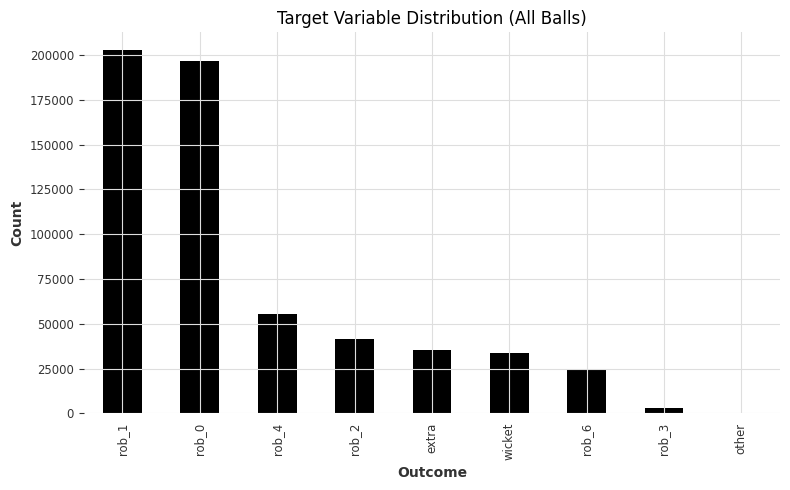

Percent distribution (%):
 rob_1     34.20
rob_0     33.17
rob_4      9.40
rob_2      7.00
extra      6.01
wicket     5.68
rob_6      4.06
rob_3      0.46
other      0.02
dtype: float64


In [62]:
# bar of target variable distribution
target_cols = ['rob_0','rob_1','rob_2','rob_3','rob_4','rob_6','wicket','extra','other']

target_counts = df_all_it20s[target_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
target_counts.plot(kind='bar')
plt.title("Target Variable Distribution (All Balls)")
plt.ylabel("Count")
plt.xlabel("Outcome")
plt.tight_layout()
plt.show()

# Also show percentages
pct = (target_counts / target_counts.sum() * 100).round(2)
print("Percent distribution (%):\n", pct)


In [63]:
print(target_counts)

rob_1     202599
rob_0     196519
rob_4      55678
rob_2      41456
extra      35603
wicket     33657
rob_6      24082
rob_3       2743
other         95
dtype: int64


Summary Stats for engineered numerics 

In [134]:
num_cols = ['cum_runs','cum_wickets','runs_prev_3','over_number','balls_remaining','total_runs_off_ball', 'crr','req_runs', 'rrr'] # what else coudl I add here 
num_cols = [c for c in num_cols if c in df_all_it20s.columns]

summary_ef = df_all_it20s[num_cols].describe().T[['mean','50%','std','min','max']].rename(columns={'50%':'median'})
print(summary_ef)


                          mean     median        std  min     max
cum_runs             67.656474  62.000000  46.258179  0.0   344.0
cum_wickets           2.794832   2.000000   2.303648  0.0    10.0
runs_prev_3           3.488461   3.000000   2.836986  0.0    19.0
over_number           9.892467  10.000000   5.630377  1.0    20.0
balls_remaining      63.201243  64.000000  33.819954  0.0   120.0
total_runs_off_ball   1.200141   1.000000   1.537968  0.0     8.0
crr                   7.012864   6.933333   2.622530  0.0    78.0
req_runs             42.194961   0.000000  56.986204  0.0   345.0
rrr                   4.867791   0.000000  13.180995  0.0  1002.0


In [133]:
df_all_it20s.head(0
                  )

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,ball_number,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,crr,target_to_win,req_runs,rrr,rob_0,rob_1,rob_2,rob_3,rob_4,rob_6,wicket,extra,other,target_class


Correlation matrix 

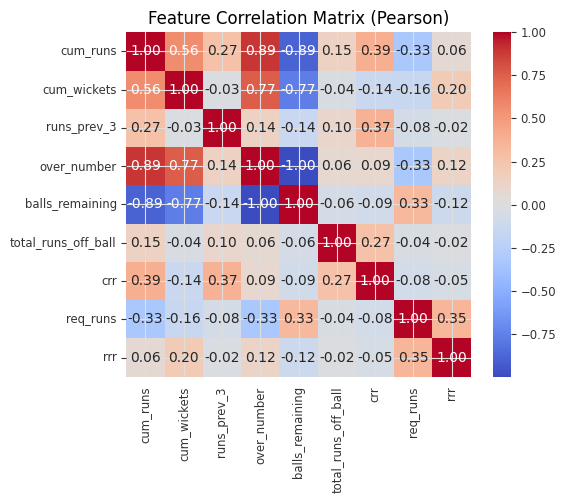

In [143]:
corr = df_all_it20s[num_cols].corr(method='pearson')

plt.figure(figsize=(6,5))
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar=True,
    xticklabels=True,
    yticklabels=True,
    linewidths=0,
    linecolor=None
)

# Turn off antialiasing so no faint edges render
for c in ax.collections:
    c.set_edgecolor("face")
    c.set_linewidth(0)
    c.set_antialiased(False)

plt.title("Feature Correlation Matrix (Pearson)")
plt.tight_layout()
plt.show()



Average run per innings at venues 

In [66]:
# Safety checks
required = {'match_id_innings','venue','total_runs_off_ball'}
if required.issubset(df_all_it20s.columns):
    # Total runs per innings
    innings_totals = (
        df_all_it20s.groupby(['match_id_innings','venue'])['total_runs_off_ball']
        .sum()
        .reset_index(name='innings_runs')
    )
    # Average per venue
    venue_avg_innings_runs = (
        innings_totals.groupby('venue')['innings_runs']
        .mean()
        .sort_values(ascending=False)
    )
    print("Average runs per INNINGS by venue:\n", venue_avg_innings_runs.head(30))
else:
    missing = required - set(df_all_it20s.columns)
    print(f"Missing columns for venue analysis: {missing}")


Average runs per INNINGS by venue:
 venue
Barsapara Cricket Stadium, Guwahati                                   226.250000
University Oval                                                       217.000000
Sky Stadium, Wellington                                               215.500000
Saxton Oval, Nelson                                                   214.500000
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh      209.500000
Punjab Cricket Association Stadium, Mohali                            208.500000
Rajiv Gandhi International Stadium, Uppal, Hyderabad                  208.500000
Rajiv Gandhi International Stadium, Uppal                             208.000000
National Cricket Stadium, Grenada                                     206.000000
Holkar Cricket Stadium, Indore                                        202.500000
Trent Bridge, Nottingham                                              200.000000
Arun Jaitley Stadium, Delhi                                        

Wicket distribution per over

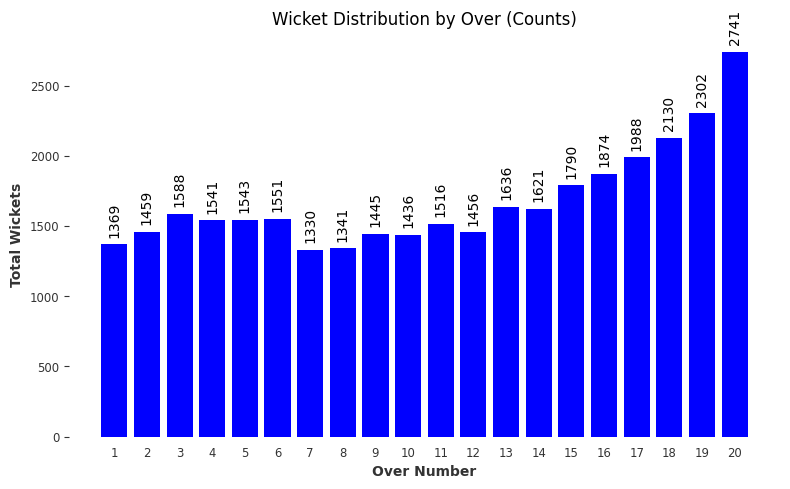

In [71]:


need = {'over_number','is_wicket'}
if need.issubset(df_all_it20s.columns):
    wickets_per_over = (
        df_all_it20s.groupby('over_number')['is_wicket']
        .sum()
        .astype(int)
        .sort_index()
    )

    plt.figure(figsize=(8,5))
    bars = plt.bar(wickets_per_over.index, wickets_per_over.values, color='blue')

    plt.xlabel("Over Number")
    plt.ylabel("Total Wickets")
    plt.title("Wicket Distribution by Over (Counts)")

    plt.xticks(wickets_per_over.index)
    plt.grid(False)

    # Add vertical labels slightly above the bars
    for x, y in zip(wickets_per_over.index, wickets_per_over.values):
        plt.text(x, y + 50, str(int(y)), ha='center', va='bottom', rotation=90)  
        # ↑ 50 is the offset, adjust if needed depending on scale

    plt.tight_layout()
    plt.show()





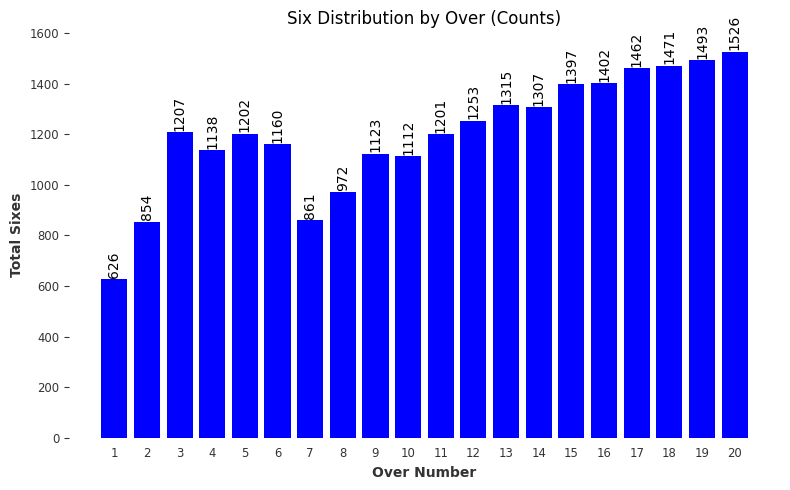

In [132]:
need = {'over_number','rob_6'}
if need.issubset(df_all_it20s.columns):
    sixes_per_over = (
        df_all_it20s.groupby('over_number')['rob_6']
        .sum()
        .astype(int)
        .sort_index()
    )

    plt.figure(figsize=(8,5))
    bars = plt.bar(sixes_per_over.index, sixes_per_over.values, color='blue')

    plt.xlabel("Over Number")
    plt.ylabel("Total Sixes")
    plt.title("Six Distribution by Over (Counts)")

    plt.xticks(sixes_per_over.index)
    plt.grid(False)

    # Add vertical labels slightly above the bars
    for x, y in zip(sixes_per_over.index, sixes_per_over.values):
        plt.text(x, y + 5, str(int(y)), ha='center', va='bottom', rotation=90)
        # ↑ offset 5 is smaller than wickets since six counts are lower

    plt.tight_layout()
    plt.show()


### Match Info 

In [ ]:
# build data frame to include wanted data from info files 
# start with teams and winner, can add more down the line 
zip_path = "t20s_male_csv2.zip"  

def parse_info_file(zf: ZipFile, member: str):
  
    match = re.search(r"(\d+)_info\.csv$", member)
    if not match:
        return None
    match_id = match.group(1)

    teams = []
    winner = None

    with zf.open(member, "r") as f:
        reader = csv.reader(io.TextIOWrapper(f, encoding="utf-8"))
        for row in reader:
            if not row:
                continue
            # Expect rows like: ["info", "team", "England"] or ["info","winner","England"]
            if row[0].strip().lower() != "info":
                continue
            if len(row) < 3:
                continue

            key = row[1].strip().lower()

            # Teams (keep first occurrence order, de-dup)
            if key == "team":
                val = row[2].strip()
                if val and val not in teams:
                    teams.append(val)

            # Winner (team name or sometimes "tie"/"no result")
            elif key == "winner":
                val = row[2].strip()
                winner = val if val else None

    # Normalise: ensure up to two team columns
    # (some files can list the same team again; we de-duplicated above)
    if len(teams) > 2:
        teams = teams[:2]
    elif len(teams) < 2:
        # pad with Nones if a malformed/old file lists fewer than two teams
        teams = teams + [None] * (2 - len(teams))

    return {
        "match_id": match_id,
        "team_1": teams[0],
        "team_2": teams[1],
        "winner": winner,
    }

# Build the dataframe from all *_info files in the zip 
rows = []
with ZipFile(zip_path, "r") as zf:
    for name in zf.namelist():
        # CricSheet convention: "<match_id>_info.csv"
        if re.search(r"_info\.csv$", name):
            rec = parse_info_file(zf, name)
            if rec:
                rows.append(rec)

df_all_info = pd.DataFrame(rows).sort_values("match_id").reset_index(drop=True)


df_all_info.head()


,match_id,team_1,team_2,winner
0,1001349,Australia,Sri Lanka,Sri Lanka
1,1001351,Australia,Sri Lanka,Sri Lanka
2,1001353,Australia,Sri Lanka,Australia
3,1004729,Ireland,Hong Kong,Hong Kong
4,1007655,Zimbabwe,India,Zimbabwe


In [130]:
unique_teams = pd.unique(
    pd.concat([df_all_info["team_1"], df_all_info["team_2"]])
)
n_teams = len(unique_teams)

print("Number of unique teams:", n_teams)
print("Teams:", unique_teams)


Number of unique teams: 104
Teams: ['Australia' 'Ireland' 'Zimbabwe' 'New Zealand' 'England' 'West Indies'
 'India' 'Pakistan' 'Hong Kong' 'Netherlands' 'United Arab Emirates'
 'Oman' 'South Africa' 'Sri Lanka' 'Bangladesh' 'Scotland'
 'Papua New Guinea' 'Philippines' 'Germany' 'Ghana' 'Uganda' 'Botswana'
 'Guernsey' 'Denmark' 'Jersey' 'Italy' 'Malaysia' 'Maldives' 'Singapore'
 'Kuwait' 'Nepal' 'Bermuda' 'Canada' 'Cayman Islands'
 'United States of America' 'Namibia' 'Kenya' 'Nigeria' 'Spain'
 'Gibraltar' 'Bhutan' 'Saudi Arabia' 'Bahrain' 'Iran' 'Qatar' 'Thailand'
 'Belgium' 'Isle of Man' 'Bulgaria' 'Romania' 'Luxembourg' 'Austria'
 'Czech Republic' 'Greece' 'Serbia' 'Malta' 'Norway' 'France' 'Sweden'
 'Portugal' 'Rwanda' 'Finland' 'Hungary' 'Estonia' 'Cyprus' 'Switzerland'
 'Seychelles' 'Malawi' 'Lesotho' 'Swaziland' 'Tanzania' 'Mozambique'
 'Sierra Leone' 'Cameroon' 'Belize' 'Bahamas' 'Argentina' 'Panama'
 'Israel' 'Croatia' 'Turkey' 'Slovenia' 'Cook Islands' 'Samoa' 'Vanuatu'
 'Fiji

In [126]:
# Count matches played
played = (
    pd.concat([df_all_info["team_1"], df_all_info["team_2"]])
    .value_counts()
    .rename("played")
)

# Count matches won 
wins = df_all_info["winner"].value_counts().rename("wins")

# Combine into summary 
summary = pd.concat([played, wins], axis=1).fillna(0).astype(int)

# Add win percentage 
summary["win_pct"] = (summary["wins"] / summary["played"] * 100).round(1)

# Sort by games played
summary_played = summary.sort_values("played", ascending=False)

summary_played.head(10)


,played,wins,win_pct
Pakistan,247,139,56.3
India,236,157,66.5
New Zealand,227,116,51.1
West Indies,208,88,42.3
Australia,201,111,55.2
England,201,102,50.7
South Africa,193,105,54.4
Sri Lanka,192,83,43.2
Bangladesh,166,63,38.0
Zimbabwe,146,58,39.7


In [131]:
summary_played.tail(15)

,played,wins,win_pct
Mali,10,0,0.0
Brazil,9,3,33.3
China,9,1,11.1
St Helena,9,2,22.2
South Korea,9,0,0.0
Gambia,9,1,11.1
Israel,8,3,37.5
Suriname,8,2,25.0
Slovenia,7,1,14.3
Ivory Coast,5,0,0.0


In [129]:
summary_win = summary.sort_values("win_pct", ascending=False)
summary_win.head(10)

,played,wins,win_pct
Spain,37,29,78.4
Uganda,92,72,78.3
Bermuda,34,24,70.6
Portugal,22,15,68.2
Japan,36,24,66.7
Switzerland,18,12,66.7
India,236,157,66.5
Jersey,38,25,65.8
Romania,40,26,65.0
Italy,28,18,64.3


### Filter out matches with innings length <30 

In [11]:
# Filter matches where either innings is shorter than min_len 
min_len = 31  # set to TFT input_chunk_length (i can change this if need)

# Rows per (match_id, innings)
lens = (
    df_all_it20s
      .groupby(['match_id', 'innings'])
      .size()
      .rename('n_rows')
      .reset_index()
)

# Keep matches that have at least two innings recorded
has_two_innings = (
    lens.groupby('match_id')['innings'].nunique() >= 2
)

# For those matches, require both innings to have length >= min_len
min_len_by_match = lens.groupby('match_id')['n_rows'].min()
good_match_ids = min_len_by_match[min_len_by_match >= min_len].index.intersection(
    has_two_innings[has_two_innings].index
)

# 4) Filter the engineered dataframe
df_all_it20s_f = df_all_it20s[df_all_it20s['match_id'].isin(good_match_ids)].copy()




In [12]:
print(
    f"Matches before: {df_all_it20s['match_id'].nunique()} | "
    f"after: {df_all_it20s_f['match_id'].nunique()} | "
    f"dropped: {df_all_it20s['match_id'].nunique() - df_all_it20s_f['match_id'].nunique()}"
)
print(
    f"Rows before: {len(df_all_it20s):,} | "
    f"after: {len(df_all_it20s_f):,} | "
    f"dropped: {len(df_all_it20s) - len(df_all_it20s_f):,}"
)

Matches before: 2620 | after: 2503 | dropped: 117
Rows before: 592,432 | after: 577,319 | dropped: 15,113


In [13]:
target_cols = ['rob_0','rob_1','rob_2','rob_3','rob_4','rob_6','wicket','extra','other']

N = len(df_all_it20s_f)
counts = df_all_it20s_f[target_cols].sum().astype(int)
summary_overall = (
    counts.to_frame('count')
          .assign(proportion=lambda d: d['count'] / N)
          .reindex(target_cols)
)
summary_overall


,count,proportion
rob_0,190994,0.330829
rob_1,198069,0.343084
rob_2,40427,0.070025
rob_3,2655,0.004599
rob_4,54314,0.094080
rob_6,23487,0.040683
wicket,32624,0.056509
extra,34655,0.060027
other,94,0.000163


In [14]:
row_sums = df_all_it20s[target_cols].sum(axis=1)
violations = (row_sums != 1)
print(f"Rows with non-exclusive targets: {int(violations.sum())} / {len(row_sums)}")

Rows with non-exclusive targets: 0 / 592432


In [15]:
by_innings_counts = df_all_it20s.groupby('innings')[target_cols].sum().astype(int)
by_innings_props  = by_innings_counts.div(df_all_it20s.groupby('innings').size(), axis=0)
by_innings_counts, by_innings_props

(          rob_0   rob_1  rob_2  rob_3  rob_4  rob_6  wicket  extra  other
 innings                                                                  
 1        102280  109646  23359   1556  29543  13296   18137  19193     41
 2         94204   92875  18050   1184  26097  10759   15485  16370     54
 3            15      33     33      3     20     17      20     20      0
 4            20      45     14      0     18     10      15     20      0,
             rob_0     rob_1     rob_2     rob_3     rob_4     rob_6    wicket  \
 innings                                                                         
 1        0.322598  0.345831  0.073676  0.004908  0.093181  0.041936  0.057205   
 2        0.342463  0.337632  0.065618  0.004304  0.094871  0.039113  0.056293   
 3        0.093168  0.204969  0.204969  0.018634  0.124224  0.105590  0.124224   
 4        0.140845  0.316901  0.098592  0.000000  0.126761  0.070423  0.105634   
 
             extra     other  
 innings                

In [16]:
phase = np.select(
    [df_all_it20s['powerplay'].eq(1), df_all_it20s['death_overs'].eq(1)],
    ['powerplay','death'],
    default='middle'
)
df_phase = df_all_it20s.assign(phase=phase)

by_phase_counts = df_phase.groupby('phase')[target_cols].sum().astype(int).loc[['powerplay','middle','death']]
by_phase_props  = by_phase_counts.div(df_phase.groupby('phase').size(), axis=0).loc[['powerplay','middle','death']]

by_phase_counts, by_phase_props

(           rob_0   rob_1  rob_2  rob_3  rob_4  rob_6  wicket  extra  other
 phase                                                                     
 powerplay  83964   47489   9848   1201  24808   6187    9051  13498     57
 middle     91858  121901  21935   1086  21705  11943   15445  15006     30
 death      20697   33209   9673    456   9165   5952    9161   7099      8,
               rob_0     rob_1     rob_2     rob_3     rob_4     rob_6  \
 phase                                                                   
 powerplay  0.428163  0.242164  0.050219  0.006124  0.126505  0.031550   
 middle     0.305268  0.405109  0.072896  0.003609  0.072131  0.039690   
 death      0.216904  0.348030  0.101373  0.004779  0.096049  0.062377   
 
              wicket     extra     other  
 phase                                    
 powerplay  0.046154  0.068831  0.000291  
 middle     0.051328  0.049869  0.000100  
 death      0.096007  0.074397  0.000084  )

### Timeseries format

In [17]:
df_all_it20s_f.head(0)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,ball_number,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,crr,target_to_win,req_runs,rrr,rob_0,rob_1,rob_2,rob_3,rob_4,rob_6,wicket,extra,other,target_class


In [18]:
# Label encode static covariates, each venue will have a unique number same with toss winner, toss decision
for col in ['venue', 'toss_winner', 'toss_decision']:
    df_all_it20s_f[col] = LabelEncoder().fit_transform(df_all_it20s_f[col].astype(str))

# set innings to binary
df_all_it20s_f['innings2'] = (df_all_it20s_f['innings'].astype(int) == 2).astype(int)


In [19]:
df_all_it20s_f.tail(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_id_innings,time_idx,total_runs_off_ball,cum_runs,is_wicket,cum_wickets,runs_prev_3,over_number,powerplay,death_overs,ball_number,city,toss_winner,toss_decision,legal_delivery,legal_delivery_number,balls_remaining,crr,target_to_win,req_runs,rrr,rob_0,rob_1,rob_2,rob_3,rob_4,rob_6,wicket,extra,other,target_class,innings2
592429,1476798,2024/25,2025-03-23,156,2,14.6,Namibia,Canada,MG Erasmus,N Davin,Akhil Kumar,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1476798_2,93,2,141,0,2,2,15,0,0,93,Windhoek,61,1,1,90,30,9.400000,143,2,0.400000,0,0,1,0,0,0,0,0,0,2,1
592430,1476798,2024/25,2025-03-23,156,2,15.1,Namibia,Canada,N Davin,MG Erasmus,Kaleem Sana,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1476798_2,94,1,142,0,2,4,16,0,0,94,Windhoek,61,1,1,91,29,9.362637,143,1,0.206897,0,1,0,0,0,0,0,0,0,1,1
592431,1476798,2024/25,2025-03-23,156,2,15.2,Namibia,Canada,MG Erasmus,N Davin,Kaleem Sana,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1476798_2,95,1,143,0,2,4,16,0,0,95,Windhoek,61,1,1,92,28,9.326087,143,0,0.000000,0,1,0,0,0,0,0,0,0,1,1


In [20]:
# specify which columns to extract from the master df
target_cols = ['rob_0', 'rob_1', 'rob_2', 'rob_3', 'rob_4', 'rob_6', 'wicket', 'extra', 'other']
past_cov_cols = ['cum_runs', 'cum_wickets', 'runs_prev_3', 'balls_remaining', 'crr', 'rrr', 'req_runs','powerplay', 'death_overs', 'over_number']
future_cov_cols = ['ball_number']
static_cov_cols = ['venue', 'toss_winner', 'toss_decision', 'innings2', 'target_to_win']



In [21]:
df_all_it20s_f.groupby('match_id_innings').size().min()

np.int64(31)

In [22]:
# Extend future covariates by one time step to ensure coverage for the last target prediction

# Convert each innings into TimeSeries format
def create_series_grouped(df):
    target_series = []
    past_cov_series = []
    future_cov_series = []
    static_covs = []

    for _, group in df.groupby("match_id_innings"):
        group = group.sort_values("time_idx")

        # targets and past: unchanged
        ts_target = TimeSeries.from_dataframe(group, value_cols=target_cols, time_col="time_idx")
        ts_past   = TimeSeries.from_dataframe(group, value_cols=past_cov_cols,  time_col="time_idx")

       # FCs, add one extra row to ball_number 
        fut_df = group[["time_idx", "ball_number"]].copy()
        last_idx = int(fut_df["time_idx"].iloc[-1])

        fut_df_ext = pd.concat(
            [fut_df, pd.DataFrame({"time_idx": [last_idx + 1], "ball_number": [last_idx + 1]})],
            ignore_index=True
        )

        ts_future = TimeSeries.from_dataframe(
            fut_df_ext, value_cols=["ball_number"], time_col="time_idx"  
        )

        # statics 
        ts_static = group[static_cov_cols].iloc[0].to_numpy(dtype=np.float32)

        target_series.append(ts_target)
        past_cov_series.append(ts_past)
        future_cov_series.append(ts_future)
        static_covs.append(ts_static)

    return target_series, past_cov_series, future_cov_series, static_covs

target_series, past_covs, future_covs, static_covs = create_series_grouped(df_all_it20s_f)

In [23]:
print("Target Series[0] shape:", target_series[0].values().shape)
print("\nPast Covariates[0] shape:", past_covs[0].values().shape)
print("\nFuture Covariates[0] shape:", future_covs[0].values().shape)
print("\nStatic Covariates[0] shape:", static_covs[0].shape)

Target Series[0] shape: (125, 9)

Past Covariates[0] shape: (125, 10)

Future Covariates[0] shape: (126, 1)

Static Covariates[0] shape: (5,)


### Pre-Process

#### TTS

In [24]:
train_targets, test_targets, train_past, test_past, train_future, test_future, train_static, test_static = train_test_split(
    target_series, past_covs, future_covs, static_covs, test_size=0.15, random_state=42
)
# getting the test set

train_targets, val_targets, train_past, val_past, train_future, val_future, train_static, val_static = train_test_split(
    train_targets, train_past, train_future, train_static, test_size=0.18, random_state=42
)
# split remaining samples into train and val sets

# check how many samples in each set
print(f"Train samples: {len(train_targets)}")
print(f"Validation samples: {len(val_targets)}")
print(f"Test samples: {len(test_targets)}")

Train samples: 3489
Validation samples: 766
Test samples: 751


#### Scale 

In [25]:
# scale past covariates
scaler_past = Scaler()
train_past_scaled = scaler_past.fit_transform(train_past)
# fit and scale train set
val_past_scaled = scaler_past.transform(val_past)
test_past_scaled = scaler_past.transform(test_past)
# dont fit scaler just apply

# Scale future covariates
scaler_future = Scaler()
# new scaler
train_future_scaled = scaler_future.fit_transform(train_future)
# fit and scale on train set
val_future_scaled = scaler_future.transform(val_future)
test_future_scaled = scaler_future.transform(test_future)
# just scale train and val set

# reattch static covariates to targets
train_targets = [ts.with_static_covariates(pd.Series(sc, index=static_cov_cols)) for ts, sc in zip(train_targets, train_static)]
val_targets = [ts.with_static_covariates(pd.Series(sc, index=static_cov_cols)) for ts, sc in zip(val_targets, val_static)]
test_targets = [ts.with_static_covariates(pd.Series(sc, index=static_cov_cols)) for ts, sc in zip(test_targets, test_static)]

# get the warnings belwo as fit on train set which is larger than val and test 

Only 766 TimeSeries (lists) were provided which is lower than the number of series (n=3489) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.
Only 751 TimeSeries (lists) were provided which is lower than the number of series (n=3489) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.
Only 766 TimeSeries (lists) were provided which is lower than the number of series (n=3489) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.
Only 751 TimeSeries (lists) were provided which is lower than the number of series (n=3489) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.


# Dont need to run

#### Model Setup
Do not run

In [41]:
# Early stopping monitors validation loss only
early_stopper = EarlyStopping(
    monitor="val_loss", # appropriate for objective 
    patience=6, # epochs with no improvement to wait before stopping
    min_delta=1e-3, # minimum change to qualify as an improvement
    mode="min", # we want to minimize validation loss
)

# Trainer kwargs passed to PyTorch Lightning
pl_kwargs = {
    "accelerator": "auto",        
    # "precision": "32-true",  # had at 16 but when .fit called got error and had to use 32 or 64 # "32-true" also didnt work. When line removed .fit ran"
    "callbacks": [early_stopper], # early stopping
    "enable_checkpointing": False, # no checkipointing yet, can implement later 
    "logger": False, # no logger for speed 
    "enable_progress_bar": True, 
}

model = TFTModel(
    # sequence lengths
    input_chunk_length=30,
    output_chunk_length=1,

    # capacity (lightweight)
    hidden_size=24,
    hidden_continuous_size=8,
    lstm_layers=1,
    num_attention_heads=2,
    dropout=0.20,

    # training
    batch_size=256,               # larger batch as dataset is bigger, may have to reduce if memory issues
    n_epochs=50,                  # early stopping will usually stop earlier
    loss_fn=nn.MSELoss(),         # one-hot targets; apply softmax at inference 
    random_state=42,
    force_reset=True,
    save_checkpoints=False,

    # pass-through to Lightning
    pl_trainer_kwargs=pl_kwargs,
    add_relative_index=True,
)

# use val loss for early stopping as it give me idea each epoch and aligned with objective 
# can introduce save best checkpoint later to fidn optimal weights is early stopping is triggered

# in this we are using MSE loss for our one hot encoded targets and then applying softmax later to get probabilities
# could be causing us issues as MSE is not ideal for classification tasks
# going to try cross entropy loss instead but will need to change targets to single integer class per ball


#### Model fit
do not run

Took 39 mins and ran 6 epochs before early stopping kicked in so model overfitting 

In [232]:
# Fit... how long will it take 
model.fit(
    series=train_targets,
    past_covariates=train_past_scaled,
    future_covariates=train_future_scaled,
    val_series=val_targets,                   # enables early stopping
    val_past_covariates=val_past_scaled,
    val_future_covariates=val_future_scaled,
    verbose=True,
)

#     num_loader_workers=8 - builds batches in parallel, speed it up (didnt work with my version of darts)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | criterion                         | MSELoss                          | 0      | train
1  | train_criterion                   | MSELoss                          | 0      | train
2  | val_criterion                     | MSELoss                          | 0      | train
3  | train_metrics                     | MetricCollection                 | 0      | train
4  | val_metrics                       | MetricCollection                 | 0      | train
5  | input_embeddings                  | _MultiEmbedding                  | 0      | train
6  | static_covariates_vsn             | _VariableSelectionNetwork        | 3.9 K  | train
7  | encoder_vsn                       | _VariableSelectionNetw

/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 6: 100%|██████████| 1554/1554 [05:38<00:00,  4.59it/s, train_loss=0.0768, val_loss=0.106] 


TFTModel(output_chunk_shift=0, hidden_size=24, lstm_layers=1, num_attention_heads=2, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.2, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=True, loss_fn=MSELoss(), likelihood=None, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=30, output_chunk_length=1, batch_size=256, n_epochs=50, random_state=42, force_reset=True, save_checkpoints=False, pl_trainer_kwargs={'accelerator': 'auto', 'callbacks': [<pytorch_lightning.callbacks.early_stopping.EarlyStopping object at 0x7f225cbdafc0>], 'enable_checkpointing': False, 'logger': False, 'enable_progress_bar': True})

### Model analysis
Do not run

#### EPOC convergence plot 

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | criterion                         | MSELoss                          | 0      | train
1  | train_criterion                   | MSELoss                          | 0      | train
2  | val_criterion                     | MSELoss                          | 0      | train
3  | train_metrics                     | MetricCollection                 | 0      | train
4  | val_metrics                       | MetricCollection                 | 0      | train
5  | input_embeddings                  | _MultiEmbedding                  | 0      | train
6  | static_covariates_vsn             | _VariableSelectionNetwork        | 3.9 K  | train
7  | encoder_vsn                       | _VariableSelectionNetw

/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 6: 100%|██████████| 1554/1554 [05:41<00:00,  4.55it/s, v_num=0, train_loss=0.0768, val_loss=0.106] 


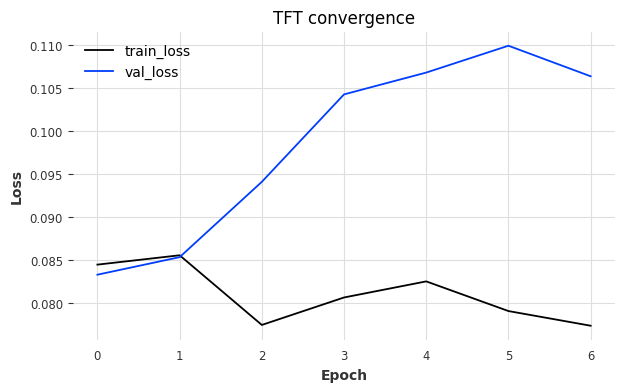

,epoch,train_loss,val_loss
4,4,0.082513,0.106813
5,5,0.079060,0.109938
6,6,0.077353,0.106382


In [ ]:
# Epoch convergence plot 
# try function but think more hassle han its worth
def make_tft(logger):
    early_stopper = EarlyStopping(monitor="val_loss", patience=6, min_delta=1e-3, mode="min") #watch val_loss
    pl_kwargs = dict(
        accelerator="auto", # use gpu if av 
        callbacks=[early_stopper], # early stopping
        enable_checkpointing=False, # no checkpointing yet 
        logger=logger, # pass logger
        enable_progress_bar=False,
    )    # settings for pytorch lightning
    return TFTModel(
        # sequence 
        input_chunk_length=30,
        output_chunk_length=1,
        # capacity
        hidden_size=24,
        hidden_continuous_size=8,
        lstm_layers=1,
        num_attention_heads=2,
        dropout=0.20,
        # training
        batch_size=256,
        n_epochs=50,
        loss_fn=nn.MSELoss(), # mse loss for one hot encoded targets
        random_state=42,
        force_reset=True,
        save_checkpoints=False,
        pl_trainer_kwargs=pl_kwargs,
        add_relative_index=True, # model knows where in sequence it is 
    )

# build logger and model
csv_logger = CSVLogger(save_dir="logs", name="tft_convergence") # where to save logs
model_conv = make_tft(csv_logger) #using our functiom 

#  fit (validation is passed so we log val_loss)
model_conv.fit(
    series=train_targets,
    past_covariates=train_past_scaled,
    future_covariates=train_future_scaled,
    val_series=val_targets,
    val_past_covariates=val_past_scaled,
    val_future_covariates=val_future_scaled,
    verbose=True,
)

# read metrics.csv and build tidy epoch-loss table
metrics_paths = glob.glob(os.path.join(csv_logger.log_dir, "metrics*.csv")) or \
                glob.glob(os.path.join(csv_logger.log_dir, "metrics.csv")) # handle different Lightning versions
assert metrics_paths, f"No metrics.csv found under {csv_logger.log_dir}" # error if not found
m = pd.read_csv(metrics_paths[0])
# find the right csv

# Lightning CSV formats vary; handle both wide and long formats
if {"train_loss", "val_loss"}.issubset(m.columns):
    loss_df = m[["epoch","train_loss","val_loss"]].groupby("epoch").last().reset_index() # one row per epoch on wide 
elif {"metric","value","epoch"}.issubset(m.columns):
    loss_df = (m.pivot_table(index="epoch", columns="metric", values="value", aggfunc="last")
                 .reset_index()) # one row per epoch on long
    # some versions use 'loss' as training key
    if "loss" in loss_df.columns and "train_loss" not in loss_df.columns:
        loss_df = loss_df.rename(columns={"loss":"train_loss"})
    assert "val_loss" in loss_df.columns and "train_loss" in loss_df.columns, \
        f"Could not find train/val loss columns in {loss_df.columns.tolist()}"
else:
    raise RuntimeError("Unrecognised metrics.csv format")

# plot
plt.figure(figsize=(7,4))
plt.plot(loss_df["epoch"], loss_df["train_loss"], label="train_loss")
plt.plot(loss_df["epoch"], loss_df["val_loss"],   label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("TFT convergence")
plt.legend()
plt.show()

loss_df.tail(3)


In [237]:
loss_df.head(8)

,epoch,train_loss,val_loss
0,0,0.084463,0.083292
1,1,0.085551,0.085333
2,2,0.077443,0.094099
3,3,0.080640,0.104274
4,4,0.082513,0.106813
5,5,0.079060,0.109938
6,6,0.077353,0.106382


Train loss decrease and val loss increase suggests overfitting. 

#### Learning Curve 

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is 

,fraction,k_series,balls,best_val_loss,train_loss_at_best,best_epoch
0,0.1,349,40452,0.083578,0.085795,2
1,0.2,698,80030,0.083557,0.081567,2
2,0.4,1396,159728,0.083507,0.085398,1
3,0.8,2792,321796,0.083812,0.080655,0
4,1.0,3489,401748,0.083587,0.084336,0


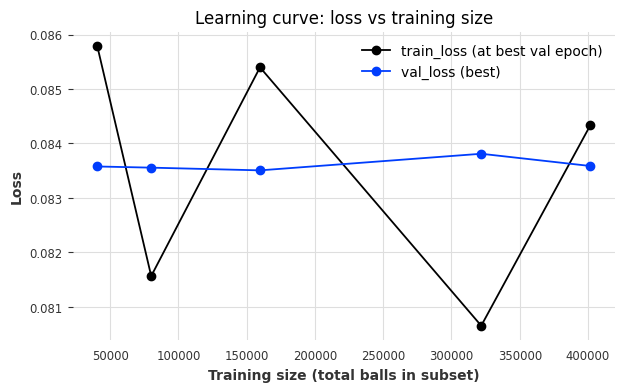

In [ ]:
# Learning curve sweep: loss vs training set size 

def read_min_val_and_train_at_best(metrics_csv):
    m = pd.read_csv(metrics_csv)
    # wide vs long handling
    if {"train_loss","val_loss"}.issubset(m.columns):
        g = m.groupby("epoch").last().reset_index()
        best_row = g.loc[g["val_loss"].idxmin()]
        return float(best_row["val_loss"]), float(best_row["train_loss"]), int(best_row["epoch"])
    elif {"metric","value","epoch"}.issubset(m.columns):
        p = (m.pivot_table(index="epoch", columns="metric", values="value", aggfunc="last")
               .reset_index())
        if "loss" in p.columns and "train_loss" not in p.columns:
            p = p.rename(columns={"loss":"train_loss"})
        best_row = p.loc[p["val_loss"].idxmin()]
        return float(best_row["val_loss"]), float(best_row["train_loss"]), int(best_row["epoch"])
    else:
        raise RuntimeError("Unrecognised metrics.csv format")
    # handle both wide and long formats 
    # for each fraction we will return best val loss, train loss at that epoch and the epoch number

rng = np.random.RandomState(42) # seed 
fractions = [0.1, 0.2, 0.4, 0.8, 1.0] # fractions of training data to try
records = []

n_series = len(train_targets) # number of training series, avoid leakage 
index_all = np.arange(n_series)

for frac in fractions:
    k = max(1, ceil(frac * n_series))
    idx = rng.choice(index_all, size=k, replace=False)
    # subset the lists consistently
    tr_t   = [train_targets[i]      for i in idx]
    tr_p   = [train_past_scaled[i]  for i in idx]
    tr_f   = [train_future_scaled[i]for i in idx]
    # loop over the fractions and create subsets

    # count "data size" as total balls in subset (ie sum of series lengths)
    total_balls = int(sum(len(ts) for ts in tr_t))

    # logger per fraction
    csv_logger = CSVLogger(save_dir="logs", name=f"tft_lcurve_{int(frac*100)}")
    model_lc = make_tft(csv_logger)

    model_lc.fit(
        series=tr_t,
        past_covariates=tr_p,
        future_covariates=tr_f,
        val_series=val_targets,
        val_past_covariates=val_past_scaled,
        val_future_covariates=val_future_scaled,
        verbose=False,
    )
    # fit the model on the subset

    # read metrics and get min val loss + train at that epoch
    metrics_paths = glob.glob(os.path.join(csv_logger.log_dir, "metrics*.csv")) or \
                    glob.glob(os.path.join(csv_logger.log_dir, "metrics.csv"))
    assert metrics_paths, f"No metrics.csv for frac={frac}"
    best_val, train_at_best, best_epoch = read_min_val_and_train_at_best(metrics_paths[0])

    records.append({
        "fraction": frac,
        "k_series": k,
        "balls": total_balls,
        "best_val_loss": best_val,
        "train_loss_at_best": train_at_best,
        "best_epoch": best_epoch,
    })

lc_df = pd.DataFrame(records).sort_values("fraction").reset_index(drop=True)
display(lc_df)
# learning curve dataframe

# plot loss vs training size (balls)
plt.figure(figsize=(7,4))
plt.plot(lc_df["balls"], lc_df["train_loss_at_best"], marker="o", label="train_loss (at best val epoch)")
plt.plot(lc_df["balls"], lc_df["best_val_loss"],     marker="o", label="val_loss (best)")
plt.xlabel("Training size (total balls in subset)")
plt.ylabel("Loss")
plt.title("Learning curve: loss vs training size")
plt.legend()
plt.show()


# val loss is not improving much with more data, may have to tweak model or features
# but at least we know we have enough data to train on

# train loss is all over the place 

### Cross entropy loss
do not run 

We are using cross entropy loss as we want a true probability distribution (probabilites sum to 1 during train)
CE is catogorical log loss we are doing a multiclass prediction 
We saw overfitting with MSE and so hope thi swill fix 

Keep 9 target columns but create target_class for format
chnage loss to X-entropy 
CE will internally use softmax so classes compete during train and probailites sum to one 

why originally MSE 
- worked iwth our 9 target variables, simplest, originally had overlapping labels which we now dont and got probabilities from softmax post processing 

#### Trial

In [ ]:
# cross-entropy loss for one-hot targets

class CrossEntropyFromOneHot(nn.Module):
    def __init__(self, class_weights=None, label_smoothing=0.0): # pass a 9-long tensor for class_weights if i want imbalance handling
        super().__init__()
        self.weights = None
        if class_weights is not None:
            self.register_buffer("weights",
                torch.as_tensor(class_weights, dtype=torch.float32))
        self.label_smoothing = float(label_smoothing)

    def forward(self, logits, y_onehot):
        # logits: [B, T, C], B = Batch size (256), T = time steps (i use 1), C = classes (9 here)
        target = y_onehot.argmax(dim=-1)          # convert one-hot to integer class labels so we can use cross-entropy 
        B, T, C = logits.shape # this is the shape TFT uses for logits
        weight = self.weights.to(logits.device) if self.weights is not None else None # ensure weights on correct device if we use later 
        return F.cross_entropy(
            logits.reshape(B*T, C),
            target.reshape(B*T),
            weight=weight,
            label_smoothing=self.label_smoothing if self.label_smoothing > 0 else 0.0, # apply label smoothing if >0
            reduction="mean",
        ) # flatten B and T for cross-entropy

# Early stopping 
early_stopper = EarlyStopping(monitor="val_loss", patience=6, min_delta=1e-3, mode="min") # if val loss doesnt improve by 0.001 for 6 epochs stop
csv_logger = CSVLogger(save_dir="logs", name="tft_ce_convergence") # logger to save metrics for plotting
pl_kwargs = dict(
    accelerator="auto",
    callbacks=[early_stopper],
    enable_checkpointing=False,   # turn on "best-only" later
    logger=csv_logger,
    enable_progress_bar=True,
)
    # during inference we will apply softmax to logits to get probabilities
    
# Build the model with CE loss
ce_loss = CrossEntropyFromOneHot(
    class_weights=None,           
    label_smoothing=0.05,         # try 0.05–0.10; set 0.0 to disable
)

model = TFTModel(
    input_chunk_length=30,
    output_chunk_length=1,
    hidden_size=24,
    hidden_continuous_size=8,
    lstm_layers=1,
    num_attention_heads=2,
    dropout=0.20,                 # bump to 0.25–0.30 if overfitting persists
    batch_size=256,
    n_epochs=50,
    loss_fn=ce_loss,              # switched from MSE to CE
    random_state=42,
    force_reset=True,
    save_checkpoints=False,
    pl_trainer_kwargs=pl_kwargs,
    add_relative_index=True,
)



In [55]:
# Fit (same as before)
model.fit(
    series=train_targets,
    past_covariates=train_past_scaled,
    future_covariates=train_future_scaled,
    val_series=val_targets,
    val_past_covariates=val_past_scaled,
    val_future_covariates=val_future_scaled,
    verbose=True,
)




GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | criterion                         | CrossEntropyFromOneHot           | 0      | train
1  | train_criterion                   | CrossEntropyFromOneHot           | 0      | train
2  | val_criterion                     | CrossEntropyFromOneHot           | 0      | train
3  | train_metrics                     | MetricCollection                 | 0      | train
4  | val_metrics                       | MetricCollection                 | 0      | train
5  | input_embeddings                  | _MultiEmbedding                  | 0      | train
6  | static_covariates_vsn             | _VariableSelectionNetwork        | 3.9 K  | train
7  | encoder_vsn                       | _VariableSelectionNetw

/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 6: 100%|██████████| 1554/1554 [05:40<00:00,  4.57it/s, v_num=0, train_loss=1.540, val_loss=2.360]


TFTModel(output_chunk_shift=0, hidden_size=24, lstm_layers=1, num_attention_heads=2, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.2, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=True, loss_fn=CrossEntropyFromOneHot(), likelihood=None, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=30, output_chunk_length=1, batch_size=256, n_epochs=50, random_state=42, force_reset=True, save_checkpoints=False, pl_trainer_kwargs={'accelerator': 'auto', 'callbacks': [<pytorch_lightning.callbacks.early_stopping.EarlyStopping object at 0x7fb8f7bbf980>], 'enable_checkpointing': False, 'logger': <pytorch_lightning.loggers.csv_logs.CSVLogger object at 0x7fb8f9b3f0b0>, 'enable_progress_bar': True})

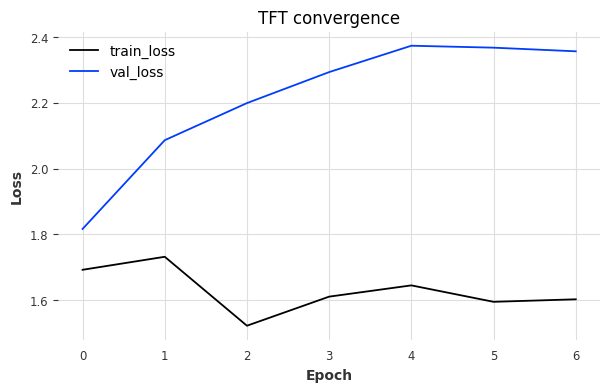

,epoch,train_loss,val_loss
0,0,1.691833,1.816090
1,1,1.731414,2.086175
2,2,1.521660,2.199028
3,3,1.610160,2.293328
4,4,1.644415,2.373567
5,5,1.594397,2.367639
6,6,1.602032,2.356574


In [57]:
# Epoch convergence plot
metrics_paths = glob.glob(os.path.join(csv_logger.log_dir, "metrics*.csv")) or \
                glob.glob(os.path.join(csv_logger.log_dir, "metrics.csv"))
assert metrics_paths, f"No metrics.csv found under {csv_logger.log_dir}"
m = pd.read_csv(metrics_paths[0])

# Lightning CSV formats vary; handle both wide and long formats
if {"train_loss", "val_loss"}.issubset(m.columns):
    loss_df = m[["epoch","train_loss","val_loss"]].groupby("epoch").last().reset_index()
elif {"metric","value","epoch"}.issubset(m.columns):
    loss_df = (m.pivot_table(index="epoch", columns="metric", values="value", aggfunc="last")
                 .reset_index())
    # some versions use 'loss' as training key
    if "loss" in loss_df.columns and "train_loss" not in loss_df.columns:
        loss_df = loss_df.rename(columns={"loss":"train_loss"})
    assert "val_loss" in loss_df.columns and "train_loss" in loss_df.columns, \
        f"Could not find train/val loss columns in {loss_df.columns.tolist()}"
else:
    raise RuntimeError("Unrecognised metrics.csv format")

# 4) plot
plt.figure(figsize=(7,4))
plt.plot(loss_df["epoch"], loss_df["train_loss"], label="train_loss")
plt.plot(loss_df["epoch"], loss_df["val_loss"],   label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("TFT convergence")
plt.legend()
plt.show()

loss_df.tail(8)

Again we are stopping at 6 epochs, our loss is getting worse 

It seems to dip after 4 gradually, did the same on MSE ?

Do I remove early stopping and run 20 epochs and see hwo it does? 

my min delta is not imrpove by 0.001 for 6 epochs. Loss is decreasing by 0.3 after first epoch ???

#### Curb early overfit 

In [ ]:
# Early stopping (shorter)
early_stopper = EarlyStopping(
    monitor="val_loss",
    patience=3,          # was 6
    min_delta=1e-3,
    mode="min",
)

# Logger + Lightning trainer kwargs
csv_logger = CSVLogger(save_dir="logs", name="tft_ce_tight") # new logger
pl_kwargs = dict(
    accelerator="auto",
    callbacks=[early_stopper],
    enable_checkpointing=False,     # turn on best-only later for finalists
    logger=csv_logger,
    enable_progress_bar=True,
    gradient_clip_val=1.0,          # new,  clip grads for stability
)

# CE loss 
ce_loss = CrossEntropyFromOneHot(
    class_weights=None,
    label_smoothing=0.05,
)

# 4) Model with smaller capacity + weight decay + lower LR (Adam)
model = TFTModel(
    input_chunk_length=30,
    output_chunk_length=1,

    # smaller / more regularised
    hidden_size=16,                 # was 24
    hidden_continuous_size=8,
    lstm_layers=1,
    num_attention_heads=1,          # was 2
    dropout=0.30,                   # was 0.20

    batch_size=256,                 # keep for now, can try 128 if needed
    n_epochs=50,

    loss_fn=ce_loss,
    random_state=42,
    force_reset=True,
    save_checkpoints=False,
    pl_trainer_kwargs=pl_kwargs,
    add_relative_index=True,

    # ADAM (default) optimiser settings 
    optimizer_kwargs={
        "lr": 5e-4,                 # was implicit 1e-3
        "weight_decay": 1e-4,       # new L2 regularisation
    },
)


In [60]:
# Fit (same as before)
model.fit(
    series=train_targets,
    past_covariates=train_past_scaled,
    future_covariates=train_future_scaled,
    val_series=val_targets,
    val_past_covariates=val_past_scaled,
    val_future_covariates=val_future_scaled,
    verbose=True,
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | criterion                         | CrossEntropyFromOneHot           | 0      | train
1  | train_criterion                   | CrossEntropyFromOneHot           | 0      | train
2  | val_criterion                     | CrossEntropyFromOneHot           | 0      | train
3  | train_metrics                     | MetricCollection                 | 0      | train
4  | val_metrics                       | MetricCollection                 | 0      | train
5  | input_embeddings                  | _MultiEmbedding                  | 0      | train
6  | static_covariates_vsn             | _VariableSelectionNetwork        | 3.0 K  | train
7  | encoder_vsn                       | _VariableSelectionNetw

/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 3: 100%|██████████| 1554/1554 [05:14<00:00,  4.94it/s, v_num=0, train_loss=1.740, val_loss=1.880]


TFTModel(output_chunk_shift=0, hidden_size=16, lstm_layers=1, num_attention_heads=1, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.3, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=True, loss_fn=CrossEntropyFromOneHot(), likelihood=None, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=30, output_chunk_length=1, batch_size=256, n_epochs=50, random_state=42, force_reset=True, save_checkpoints=False, pl_trainer_kwargs={'accelerator': 'auto', 'callbacks': [<pytorch_lightning.callbacks.early_stopping.EarlyStopping object at 0x7fb8bcaee840>], 'enable_checkpointing': False, 'logger': <pytorch_lightning.loggers.csv_logs.CSVLogger object at 0x7fb8bcaeecc0>, 'enable_progress_bar': True, 'gradient_clip_val': 1.0}, optimizer_kwargs={'lr': 0.0005, 'weight_decay': 0.0001})

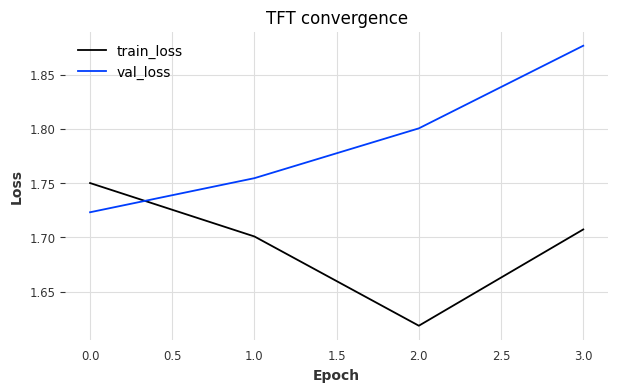

,epoch,train_loss,val_loss
0,0,1.750119,1.723221
1,1,1.700905,1.754622
2,2,1.618730,1.800494
3,3,1.707385,1.876580


In [61]:
# Epoch convergence plot
metrics_paths = glob.glob(os.path.join(csv_logger.log_dir, "metrics*.csv")) or \
                glob.glob(os.path.join(csv_logger.log_dir, "metrics.csv"))
assert metrics_paths, f"No metrics.csv found under {csv_logger.log_dir}"
m = pd.read_csv(metrics_paths[0])

# Lightning CSV formats vary; handle both wide and long formats
if {"train_loss", "val_loss"}.issubset(m.columns):
    loss_df = m[["epoch","train_loss","val_loss"]].groupby("epoch").last().reset_index()
elif {"metric","value","epoch"}.issubset(m.columns):
    loss_df = (m.pivot_table(index="epoch", columns="metric", values="value", aggfunc="last")
                 .reset_index())
    # some versions use 'loss' as training key
    if "loss" in loss_df.columns and "train_loss" not in loss_df.columns:
        loss_df = loss_df.rename(columns={"loss":"train_loss"})
    assert "val_loss" in loss_df.columns and "train_loss" in loss_df.columns, \
        f"Could not find train/val loss columns in {loss_df.columns.tolist()}"
else:
    raise RuntimeError("Unrecognised metrics.csv format")

# 4) plot
plt.figure(figsize=(7,4))
plt.plot(loss_df["epoch"], loss_df["train_loss"], label="train_loss")
plt.plot(loss_df["epoch"], loss_df["val_loss"],   label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("TFT convergence")
plt.legend()
plt.show()

loss_df.tail(8)

So our best val loss has improved now 1.72 rather than 1.82 

however, still reach on optimisation on first epoch 

#### Tighten again 

In [ ]:
# Early stopping (shorter)
early_stopper = EarlyStopping(
    monitor="val_loss",
    patience=2,          # shorter while tuning
    min_delta=1e-3,
    mode="min",
)

# New logger for this run
csv_logger = CSVLogger(save_dir="logs", name="tft_ce_lr3e4_bs128_drop35_wd2e4")

# Lightning trainer kwargs
pl_kwargs = dict(
    accelerator="auto",
    callbacks=[early_stopper],
    enable_checkpointing=False,    # turn on best-only later for finalists
    logger=csv_logger,
    enable_progress_bar=True,
    gradient_clip_val=1.0,         # gradient clipping for stability
)

# CE loss 
ce_loss = CrossEntropyFromOneHot(
    class_weights=None,
    label_smoothing=0.0,           # try 0.0 first; then 0.05
)

# Model with smaller capacity + stronger regularisation + lower LR + smaller batch
model = TFTModel(
    input_chunk_length=30,
    output_chunk_length=1,

    hidden_size=16,
    hidden_continuous_size=8,
    lstm_layers=1,
    num_attention_heads=1,
    dropout=0.35,                  # was 0.30

    batch_size=128,                # was 256
    n_epochs=50,

    loss_fn=ce_loss,
    random_state=42,
    force_reset=True,
    save_checkpoints=False,
    pl_trainer_kwargs=pl_kwargs,
    add_relative_index=True,

    optimizer_kwargs={
        "lr": 3e-4,                # was 5e-4
        "weight_decay": 2e-4,      # was 1e-4
    },
)

# a lot slower with decreased batch size 


In [63]:
model.fit(
    series=train_targets,
    past_covariates=train_past_scaled,
    future_covariates=train_future_scaled,
    val_series=val_targets,
    val_past_covariates=val_past_scaled,
    val_future_covariates=val_future_scaled,
    verbose=True,
)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | criterion                         | CrossEntropyFromOneHot           | 0      | train
1  | train_criterion                   | CrossEntropyFromOneHot           | 0      | train
2  | val_criterion                     | CrossEntropyFromOneHot           | 0      | train
3  | train_metrics                     | MetricCollection                 | 0      | train
4  | val_metrics                       | MetricCollection                 | 0      | train
5  | input_embeddings                  | _MultiEmbedding                  | 0      | train
6  | static_covariates_vsn             | _VariableSelectionNetwork        | 3.0 K  | train
7  | encoder_vsn                       | _VariableSelectionNetw

Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 10.94it/s]

/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 2: 100%|██████████| 3108/3108 [11:44<00:00,  4.41it/s, v_num=0, train_loss=1.540, val_loss=1.750]


TFTModel(output_chunk_shift=0, hidden_size=16, lstm_layers=1, num_attention_heads=1, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.35, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=True, loss_fn=CrossEntropyFromOneHot(), likelihood=None, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=30, output_chunk_length=1, batch_size=128, n_epochs=50, random_state=42, force_reset=True, save_checkpoints=False, pl_trainer_kwargs={'accelerator': 'auto', 'callbacks': [<pytorch_lightning.callbacks.early_stopping.EarlyStopping object at 0x7fb8bcaeef30>], 'enable_checkpointing': False, 'logger': <pytorch_lightning.loggers.csv_logs.CSVLogger object at 0x7fb8bcb0c080>, 'enable_progress_bar': True, 'gradient_clip_val': 1.0}, optimizer_kwargs={'lr': 0.0003, 'weight_decay': 0.0002})

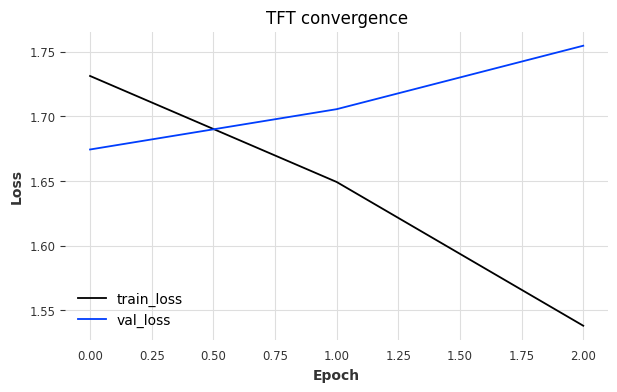

,epoch,train_loss,val_loss
0,0,1.731324,1.674467
1,1,1.649350,1.705641
2,2,1.538193,1.754709


In [64]:
metrics_paths = glob.glob(os.path.join(csv_logger.log_dir, "metrics*.csv")) or \
                glob.glob(os.path.join(csv_logger.log_dir, "metrics.csv"))
assert metrics_paths, f"No metrics.csv found under {csv_logger.log_dir}"
m = pd.read_csv(metrics_paths[0])

if {"train_loss","val_loss"}.issubset(m.columns):
    loss_df = m[["epoch","train_loss","val_loss"]].groupby("epoch").last().reset_index()
elif {"metric","value","epoch"}.issubset(m.columns):
    loss_df = (m.pivot_table(index="epoch", columns="metric", values="value", aggfunc="last")
                 .reset_index())
    if "loss" in loss_df.columns and "train_loss" not in loss_df.columns:
        loss_df = loss_df.rename(columns={"loss":"train_loss"})
else:
    raise RuntimeError("Unrecognised metrics.csv format")

plt.figure(figsize=(7,4))
plt.plot(loss_df["epoch"], loss_df["train_loss"], label="train_loss")
plt.plot(loss_df["epoch"], loss_df["val_loss"],   label="val_loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("TFT convergence")
plt.legend(); plt.show()

loss_df.tail(5)


### gridsearch 
do not run

In [66]:
# crossentorpyfromonehot needs to be defined already (in trial block) 

# single run helper 
def fit_once(lr, dropout, weight_decay, batch_size=128, name=None):
    # callbacks
    es = EarlyStopping(monitor="val_loss", patience=2, min_delta=1e-3, mode="min")
    ckpt = ModelCheckpoint(
        monitor="val_loss", mode="min",
        save_top_k=1, save_last=False,
        filename="best-{epoch:02d}-{val_loss:.4f}"
    )
    # lightweight logger for this run
    logger = CSVLogger(save_dir="logs", name=name or "tft_gs")

    # Lightning trainer kwargs
    pl_kwargs = dict(
        accelerator="auto",
        callbacks=[es, ckpt],
        enable_checkpointing=True,
        logger=logger,
        enable_progress_bar=False,
        gradient_clip_val=1.0,
    )

    # CE loss with no smoothing
    ce = CrossEntropyFromOneHot(class_weights=None, label_smoothing=0.0)

    # model 
    model = TFTModel(
        input_chunk_length=30,
        output_chunk_length=1,
        hidden_size=16,
        hidden_continuous_size=8,
        lstm_layers=1,
        num_attention_heads=1,
        dropout=dropout,
        batch_size=batch_size,
        n_epochs=50,
        loss_fn=ce,
        random_state=42,
        force_reset=True,
        save_checkpoints=False,    # ModelCheckpoint handles saving
        pl_trainer_kwargs=pl_kwargs,
        add_relative_index=True,
        optimizer_kwargs={"lr": lr, "weight_decay": weight_decay},
    )

    # fit
    model.fit(
        series=train_targets,
        past_covariates=train_past_scaled,
        future_covariates=train_future_scaled,
        val_series=val_targets,
        val_past_covariates=val_past_scaled,
        val_future_covariates=val_future_scaled,
        verbose=False,
    )

    # grab best val loss directly from checkpoint callback
    best_val = float(ckpt.best_model_score.cpu().item())
    return {
        "lr": lr,
        "dropout": dropout,
        "weight_decay": weight_decay,
        "batch_size": batch_size,
        "best_val_loss": best_val,
        "best_ckpt": ckpt.best_model_path,
        "log_dir": logger.log_dir,
    }

# small grid 
LRS       = [2e-4, 3e-4]
DROPOUTS  = [0.30, 0.35]
WDS       = [1e-4, 2e-4, 5e-4]
BATCH     = 128

records = []
for lr, dr, wd in itertools.product(LRS, DROPOUTS, WDS):
    name = f"tft_gs_lr{lr:.0e}_dr{int(dr*100)}_wd{wd:.0e}"
    rec = fit_once(lr, dr, wd, batch_size=BATCH, name=name)
    records.append(rec)
    gc.collect()

grid_df = pd.DataFrame(records).sort_values("best_val_loss").reset_index(drop=True)
display(grid_df.head(10))
print("Top config:\n", grid_df.loc[0, ["lr","dropout","weight_decay","batch_size"]])
print("Best checkpoint path:\n", grid_df.loc[0, "best_ckpt"])


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is 

,lr,dropout,weight_decay,batch_size,best_val_loss,best_ckpt,log_dir
0,0.0002,0.35,0.0005,128,1.654702,logs/tft_gs_lr2e-04_dr35_wd5e-04/version_0/che...,logs/tft_gs_lr2e-04_dr35_wd5e-04/version_0
1,0.0002,0.30,0.0002,128,1.658667,logs/tft_gs_lr2e-04_dr30_wd2e-04/version_0/che...,logs/tft_gs_lr2e-04_dr30_wd2e-04/version_0
2,0.0003,0.30,0.0005,128,1.659063,logs/tft_gs_lr3e-04_dr30_wd5e-04/version_0/che...,logs/tft_gs_lr3e-04_dr30_wd5e-04/version_0
3,0.0002,0.30,0.0005,128,1.659584,logs/tft_gs_lr2e-04_dr30_wd5e-04/version_0/che...,logs/tft_gs_lr2e-04_dr30_wd5e-04/version_0
4,0.0002,0.35,0.0001,128,1.660366,logs/tft_gs_lr2e-04_dr35_wd1e-04/version_0/che...,logs/tft_gs_lr2e-04_dr35_wd1e-04/version_0
5,0.0002,0.30,0.0001,128,1.661067,logs/tft_gs_lr2e-04_dr30_wd1e-04/version_0/che...,logs/tft_gs_lr2e-04_dr30_wd1e-04/version_0
6,0.0003,0.30,0.0002,128,1.663746,logs/tft_gs_lr3e-04_dr30_wd2e-04/version_0/che...,logs/tft_gs_lr3e-04_dr30_wd2e-04/version_0
7,0.0002,0.35,0.0002,128,1.665288,logs/tft_gs_lr2e-04_dr35_wd2e-04/version_0/che...,logs/tft_gs_lr2e-04_dr35_wd2e-04/version_0
8,0.0003,0.30,0.0001,128,1.666121,logs/tft_gs_lr3e-04_dr30_wd1e-04/version_0/che...,logs/tft_gs_lr3e-04_dr30_wd1e-04/version_0
9,0.0003,0.35,0.0005,128,1.666907,logs/tft_gs_lr3e-04_dr35_wd5e-04/version_0/che...,logs/tft_gs_lr3e-04_dr35_wd5e-04/version_0


Top config:
 lr              0.0002
dropout           0.35
weight_decay    0.0005
batch_size         128
Name: 0, dtype: object
Best checkpoint path:
 logs/tft_gs_lr2e-04_dr35_wd5e-04/version_0/checkpoints/best-epoch=02-val_loss=1.6547.ckpt


# Continue

### Best Model

#### CE

In [ ]:
# Custom cross-entropy loss for one-hot targets
# CEL would expect integer class labels, so we convert one-hot to integer inside the loss
class CrossEntropyFromOneHot(nn.Module):
    def __init__(self, class_weights=None, label_smoothing=0.0):
        super().__init__()
        self.weights = None # can add class weights for imbalance handling later if want, deafault None
        if class_weights is not None:
            # register as buffer so it moves with the module to the right device
            self.register_buffer("weights", torch.as_tensor(class_weights, dtype=torch.float32))
        self.label_smoothing = float(label_smoothing)   # smoothing is 0.0 

    def forward(self, self_logits, y_onehot):
        # self_logits: [B, T, C]; y_onehot: [B, T, C] (one-hot)
        B, T, C = self_logits.shape  #shape TFT uses for logits
        target = y_onehot.argmax(dim=-1)  # converts one-hot to integer class labels
        weight = self.weights.to(self_logits.device) if self.weights is not None else None # weights 
        return F.cross_entropy(
            self_logits.reshape(B*T, C), # flatten B and T for cross-entropy
            target.reshape(B*T),
            weight=weight,
            label_smoothing=self.label_smoothing if self.label_smoothing > 0 else 0.0,
            reduction="mean",
        )

# smoothing is 0.0 so it does nothing, if it is >0 it subtracts from the true class prob and adds it to other classes equally
# can help regularise the model and can improve generalisation, makes training less over confident 

# Flattening B and T allows to apply standard cross-entropy loss which expects 2D inputs

# Can use if we bucket target classes later, would just need to adjust weights if we use 

#### Setup 

In [41]:
# Early stopping + ModelCheckpoint + Logger
RUN_NAME = "tft_best"

es = EarlyStopping(monitor="val_loss", patience=2, min_delta=1e-3, mode="min") # low patience as I belive model well fit after 1 epoch

logger = CSVLogger(save_dir="logs", name=RUN_NAME) # logger to save metrics

pl_kwargs = dict(
    accelerator="auto",
    callbacks=[es],
    enable_checkpointing=True,
    logger=logger,
    enable_progress_bar=False,
    gradient_clip_val=1.0,
)
# pass callbacks then same as before

# use custom CE loss
ce = CrossEntropyFromOneHot(class_weights=None, label_smoothing=0.0)

# model config with best params from grid search
best_model = TFTModel(
    input_chunk_length=30,
    output_chunk_length=1,
    hidden_size=16,
    hidden_continuous_size=8,
    lstm_layers=1,
    num_attention_heads=1,
    dropout=0.35,               # best
    batch_size=128,             # best
    n_epochs=50,                # early stopping will stop earlier
    loss_fn=ce,
    random_state=42,
    force_reset=True,
    save_checkpoints=True,            # not using ModelCheckpoint
    model_name=RUN_NAME,              # match your run name
    work_dir="logs",                  # match your logger save_dir
    pl_trainer_kwargs=pl_kwargs,      # inject kwargs 
    add_relative_index=True,          # we have one already, but safe to add, 0-1 
    optimizer_kwargs={"lr": 2e-4, "weight_decay": 5e-4},  # best (ADAM W style regularisation)
)




#### Fit

In [42]:
# fit it 
best_model.fit(
    series=train_targets,
    past_covariates=train_past_scaled,
    future_covariates=train_future_scaled,
    val_series=val_targets,
    val_past_covariates=val_past_scaled,
    val_future_covariates=val_future_scaled,
    verbose=False,
)

# we are updating weights by minimising loss on train data 
# runs on val data after each epoch to see if val loss improving

# took 57 mins 


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Exception ignored in: <function tqdm.__del__ at 0x7f57c447fc40>
Traceback (most recent call last):
  File "/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


TFTModel(output_chunk_shift=0, hidden_size=16, lstm_layers=1, num_attention_heads=1, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.35, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=True, loss_fn=CrossEntropyFromOneHot(), likelihood=None, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=30, output_chunk_length=1, batch_size=128, n_epochs=50, random_state=42, force_reset=True, save_checkpoints=True, model_name=tft_best, work_dir=logs, pl_trainer_kwargs={'accelerator': 'auto', 'callbacks': [<pytorch_lightning.callbacks.early_stopping.EarlyStopping object at 0x7f54c846c200>], 'enable_checkpointing': True, 'logger': <pytorch_lightning.loggers.csv_logs.CSVLogger object at 0x7f54c846daf0>, 'enable_progress_bar': False, 'gradient_clip_val': 1.0}, optimizer_kwargs={'lr': 0.0002, 'weight_decay': 0.0005})

#### Use best checkpoint 

In [53]:
print("fit_called:", getattr(best_model, "_fit_called", None))

fit_called: True


### Load best checkpoint 

In [48]:
best_model_eval = TFTModel.load_from_checkpoint(
    model_name="tft_best",   # RUN_NAME above
    work_dir="logs",         # save_dir passed to CSVLogger
    best=True                # grab best val_loss checkpoint
)


### Historical Forecasts

#### Helpers

In [49]:
# Stable softmax over last dimension
def softmax_logits(logits: np.ndarray, axis: int = -1) -> np.ndarray: # ce outputs logits, need to convert to probabilities
    z = logits - np.max(logits, axis=axis, keepdims=True) # subtract max for stability
    exp_z = np.exp(z) # exponentiate
    return exp_z / np.sum(exp_z, axis=axis, keepdims=True)

# Multiclass Brier score for one-hot y_true and prob predictions
# Brier measures mean squared difference between predicted probabilities and actual outcomes
# sum then average over samples
#lower is better, perfect is 0
def multiclass_brier(y_true_onehot: np.ndarray, y_prob: np.ndarray) -> float:
    # shapes: (N, C)
    return np.mean(np.sum((y_prob - y_true_onehot) ** 2, axis=1))

# Per-class accuracy (diag of confusion / support)
# how well each class is predicted
def per_class_accuracy(y_true_labels: np.ndarray, y_pred_labels: np.ndarray, n_classes: int):
    cm = confusion_matrix(y_true_labels, y_pred_labels, labels=np.arange(n_classes)) # confusion matrix
    support = cm.sum(axis=1).astype(float)
    with np.errstate(divide="ignore", invalid="ignore"):
        acc_per_class = np.where(support > 0, np.diag(cm) / support, np.nan)
    return cm, support, acc_per_class
# returns Confusion matrix, support (true samples per class), per-class accuracy 

#### HF

In [ ]:
# Historical forecasts over multiple series with multivariate targets

def run_historical_forecasts_multiclass(
    model,
    targets_list: List[TimeSeries],     # list of target series (one per innings)
    past_list: Optional[List[TimeSeries]] = None,   # list for past covariate series to provide context
    future_list: Optional[List[TimeSeries]] = None, # list for future covariate series
    stride: int = 1,
    forecast_horizon: int = 1,
    verbose: bool = False,
) -> Tuple[np.ndarray, np.ndarray, List[int]]:

    # Force first forecast one step after input chunk length
    start = model.input_chunk_length + 1

    y_pred_logits_all = []
    y_true_onehot_all = []
    lengths = []
    
    num_series = len(targets_list)
    for i in range(num_series):
        s = targets_list[i]
        p = past_list[i] if past_list is not None else None
        f = future_list[i] if future_list is not None else None
        # iterate over innings and its aligned covariates

        fc_ts = model.historical_forecasts(
            series=s,
            past_covariates=p,
            future_covariates=f,
            forecast_horizon=forecast_horizon,
            stride=stride,
            start=start,
            retrain=False,
            last_points_only=True,
            verbose=verbose,
        )

        # Align prediction and truth for matching time indices
        s_aligned = s.slice_intersect(fc_ts)
        fc_aligned = fc_ts.slice_intersect(s_aligned)

        # Extract arrays (T_i, C)
        y_true_i = s_aligned.values(copy=False)  # one-hot encoded true labels
        y_pred_i = fc_aligned.values(copy=False)  # logits due to CE loss, can softmax later

        # Collect
        y_true_onehot_all.append(y_true_i)
        y_pred_logits_all.append(y_pred_i)
        lengths.append(y_true_i.shape[0])  # can check number of predictions per innings

    # Stack across innings
    y_true_onehot = np.vstack(y_true_onehot_all) if y_true_onehot_all else np.empty((0, 0))
    y_pred_logits = np.vstack(y_pred_logits_all) if y_pred_logits_all else np.empty((0, 0))
    # combine into two big matrices 

    return y_pred_logits, y_true_onehot, lengths

# lentghs returns number of predictions per innings

# run_historical_forecasts_multiclass returns logits so we can apply stable softmax to get probabilities

# so for each innings it calls model.historical_forecasts which returns a rolling forecast after warm up period (input_chunk_length+1)
# these logits are collected into one time series fc_ts
# we then align fc_ts with the original target series s to ensure they cover the same time
# we extract the one-hot true labels and predicted logits as numpy arrays and store them in lists
# finally we stack these lists into two big numpy arrays: y_true_onehot and y_pred_logits
# lengths list keeps track of how many predictions were made for each innings

# Roll the model through each innings, predicting one ball at a time, and collect the entire set of predictions vs truths into two aligned matrices

In [ ]:
# Run on validation split 
y_pred_logits, y_true_onehot, lengths = run_historical_forecasts_multiclass(
    model=best_model_eval,
    targets_list=val_targets,       
    past_list=val_past_scaled,     
    future_list=val_future_scaled, 
    stride=1, # make prediction every ball
    forecast_horizon=1, # one-step-ahead
    verbose=False,
)

# Convert logits to probabilities via softmax using helper function
y_prob = softmax_logits(y_pred_logits, axis=1)

# Also get hard labels for metrics that need class indices 
# class order = ['rob_0','rob_1','rob_2','rob_3','rob_4','rob_6','wicket','extra','other'
# argmax gives top prob class 
y_true_labels = np.argmax(y_true_onehot, axis=1)
y_pred_labels = np.argmax(y_prob, axis=1)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU availabl

#### Metrics 

In [ ]:
# Overall accuracy
# compare true vs predicted labels
overall_acc = accuracy_score(y_true_labels, y_pred_labels)

print(f"Samples evaluated: {y_true_onehot.shape[0]}")
print(f"Overall accuracy: {overall_acc:.4f}")


Samples evaluated: 65536
Overall accuracy: 0.3846


Per class accuracy

In [81]:
# Confusion matrix + per-class accuracy
n_classes = y_true_onehot.shape[1]
# tell CM how many classes we have
cm, support, acc_per_class = per_class_accuracy(  # support = true samples per class # per class accuracy (how often each class is correctly predicted)
    y_true_labels=y_true_labels,
    y_pred_labels=y_pred_labels,
    n_classes=n_classes
)

print("\nPer-class accuracy (index order matches your class list):")
for k in range(n_classes):
    print(f"  Class {k}: acc={acc_per_class[k]:.4f}  support={int(support[k])}")


Per-class accuracy (index order matches your class list):
  Class 0: acc=0.1133  support=19191
  Class 1: acc=0.9134  support=25095
  Class 2: acc=0.0000  support=4996
  Class 3: acc=0.0000  support=250
  Class 4: acc=0.0000  support=5472
  Class 5: acc=0.0000  support=2948
  Class 6: acc=0.0273  support=3953
  Class 7: acc=0.0000  support=3625
  Class 8: acc=0.0000  support=6


In [87]:
# number of classes
n_classes = y_true_onehot.shape[1]

# actual counts (from truth)
actual_counts = np.bincount(y_true_labels, minlength=n_classes)

# predicted counts (from predictions)
pred_counts = np.bincount(y_pred_labels, minlength=n_classes)

# correct counts (where true == pred, per class)
correct_counts = np.bincount(
    y_true_labels[y_true_labels == y_pred_labels],
    minlength=n_classes
)

# per-class accuracy (handle zero division safely)
acc_per_class = np.divide(
    correct_counts, 
    actual_counts, 
    out=np.zeros_like(correct_counts, dtype=float), 
    where=actual_counts > 0
)

# build summary DataFrame
summary_df = pd.DataFrame({
    "Class": list(range(n_classes)),
    "Label": target_cols, 
    "Actual": actual_counts,
    "Predicted": pred_counts,
    "Correct": correct_counts,
    "Accuracy": acc_per_class
})

print(f"Overall accuracy: {overall_acc:.4f}")
print(summary_df)


Overall accuracy: 0.3846
   Class   Label  Actual  Predicted  Correct  Accuracy
0      0   rob_0   19191       5211     2175  0.113334
1      1   rob_1   25095      58913    22922  0.913409
2      2   rob_2    4996          0        0  0.000000
3      3   rob_3     250          0        0  0.000000
4      4   rob_4    5472          0        0  0.000000
5      5   rob_6    2948          3        0  0.000000
6      6  wicket    3953       1409      108  0.027321
7      7   extra    3625          0        0  0.000000
8      8   other       6          0        0  0.000000


Ok so when using argmax (highest probability class) the accuracy is 38% overall. We can see that 
- predicted amount of dots is a lot lower than actual 
- predicted number of singles is much higher than actual number leading to a high accuracy (lots of false positive, predicted as single even though not)
- for 2s, 3s, 4s, extras and others they never have the highest probability, so are never predicted with argmax 
- 6s are predicted 3 times to an actual 2948 occourences 
- wickets are predicted 1409 times, there is 3953 occurences but we only get 108 right. 


In [82]:
print("\nConfusion matrix (rows=true, cols=pred):")
print(cm)

# use of multiclass cm at the moment, will use OvA cm later. 


Confusion matrix (rows=true, cols=pred):
[[ 2175 16620     0     0     0     0   396     0     0]
 [ 1700 22922     0     0     0     1   472     0     0]
 [  314  4557     0     0     0     0   125     0     0]
 [   22   221     0     0     0     0     7     0     0]
 [  353  4974     0     0     0     0   145     0     0]
 [  101  2782     0     0     0     0    65     0     0]
 [  263  3580     0     0     0     2   108     0     0]
 [  282  3252     0     0     0     0    91     0     0]
 [    1     5     0     0     0     0     0     0     0]]


Brier

In [83]:
# Multiclass Brier score from helper function
# compare predicted probabilities vs one-hot true labels
# probability calibration metric, are the predicted probibility close to the true outcomes
brier = multiclass_brier(y_true_onehot, y_prob)
print(f"Brier score:      {brier:.6f}")

Brier score:      0.744859


### Feature Importance

Choosen to use TFTExplainer 

Could use permuataton but 
- it is computationally inefficient 
- TFTs design already leanrs explicit variable selection 

In [88]:
from darts.explainability import TFTExplainer
# could be this one aslso 
#   from darts.explainability.tft_explainer import TFTExplainer

#### troubleshoot 
dont run 

In [109]:
ocl = best_model_eval.output_chunk_length
icl = best_model_eval.input_chunk_length

print("input_chunk_length:", icl, "output_chunk_length:", ocl)

bad = []
for i, (y, p, f) in enumerate(zip(val_targets, val_past_scaled, val_future_scaled)):
    margin = len(f) - len(y)   # how many future steps beyond target
    ok = (len(y) >= icl) and (margin >= ocl)
    if not ok:
        bad.append((i, len(y), len(p), len(f), margin))

print(f"{len(bad)} sequences violate requirements.")
if bad:
    print("Example bad seq:", bad[0])  # (index, len_y, len_p, len_f, margin)


input_chunk_length: 30 output_chunk_length: 1
0 sequences violate requirements.


In [ ]:
# DONT RUN 
# there is no bad sequences the issue is due to the sequences being different lentghs i think 
# so iteratvley run importance individually then aggregate 

icl = best_model_eval.input_chunk_length
ocl = best_model_eval.output_chunk_length

def try_one(i):
    y = val_targets[i]
    p = val_past_scaled[i]
    f = val_future_scaled[i]
    print(f"\nChecking series #{i}: lens (y,p,f)=({len(y)},{len(p)},{len(f)}), "
          f"margin={len(f)-len(y)}, icl={icl}, ocl={ocl}")
    # sanity: indexes should align on the historic part
    print("start indexes:", y.time_index[0], p.time_index[0], f.time_index[0])
    print("end   indexes:", y.time_index[-1], p.time_index[-1], f.time_index[-1])
    # the historic part of future should match target’s index
    print("historic match:",
          f.time_index[:len(y)].equals(y.time_index))

    # try explaining just this one triplet
    _ = explainer.explain(
        foreground_series=[y],
        foreground_past_covariates=[p],
        foreground_future_covariates=[f],
    )
    print("OK")

bad_idxs = []
for i in range(len(val_targets)):
    try:
        try_one(i)
    except Exception as e:
        print(f"FAILED at series #{i}: {type(e).__name__}: {e}")
        bad_idxs.append(i)

print("\nBad indices:", bad_idxs)


#### COntinue

In [ ]:
# explainer setup on training data 
# used for background 

explainer = TFTExplainer(
    model=best_model_eval,
    background_series=train_targets,                 # 
    background_past_covariates=train_past_scaled,    # 
    background_future_covariates=train_future_scaled # 
)

In [ ]:
all_results = []
skipped = []
# to avoid issues with varying lengths, run one by one and catch exceptions

for i, (y, p, f) in enumerate(zip(val_targets, val_past_scaled, val_future_scaled)): # iterate over validation set
    try:
        r = explainer.explain(
            foreground_series=[y],
            foreground_past_covariates=[p],
            foreground_future_covariates=[f],
        ) # call explainer on one innings 
        all_results.append(r)   # save for aggregation later
    except Exception as e:
        print(f"Skipped series {i}: {e}")
        skipped.append(i) 
        # if some issue skip and log index

print(f"Explained {len(all_results)} innings; skipped {len(skipped)}.")


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/svygb4/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
GPU available: False, used: False
TPU

Explained 766 innings; skipped 0.


In [ ]:
# structure for one innings 
tmp = all_results[0].get_feature_importances()
print(tmp if isinstance(tmp, dict) else tmp[0])


{'encoder_importance':    rob_3_target  extra_target  balls_remaining_pastcov  crr_pastcov  \
0           2.2           2.2                      2.2          2.2   

   add_relative_index_futcov  over_number_pastcov  rob_4_target  \
0                        2.2                  2.2           2.3   

   runs_prev_3_pastcov  req_runs_pastcov  rrr_pastcov  rob_2_target  \
0                  2.3               2.3          2.3           2.3   

   rob_1_target  powerplay_pastcov  death_overs_pastcov  wicket_target  \
0           2.3                2.4                  2.4            2.4   

   cum_wickets_pastcov  cum_runs_pastcov  rob_0_target  other_target  \
0                  2.4               2.6           3.2           8.0   

   ball_number_futcov  rob_6_target  
0                24.7          25.0  , 'decoder_importance':    add_relative_index_futcov  ball_number_futcov
0                       17.4                82.6, 'static_covariates_importance':    innings2_statcov  venue_statc

In [ ]:
from collections import defaultdict

def agg_block(results_list, block_key):
    """Average importances across innings for one block key from get_feature_importances()."""
    from collections import defaultdict
    acc = defaultdict(float) # collect sum of importances
    n = 0                  # count innings
    for r in results_list: # loop over innins 
        imp = r.get_feature_importances() # just dict not dict list 
        if isinstance(imp, list):   # single-series case
            imp = imp[0]
        d = imp[block_key]          # dictionary for given block 
        for feat, w in d.items():
            acc[feat] += float(w)  # for each feature and its importance weight
        n += 1 # count innings
    return {k: v / max(n, 1) for k, v in acc.items()} # average importances over innings

enc_mean = agg_block(all_results, "encoder_importance")     # average historic feature importance 
dec_mean = agg_block(all_results, "decoder_importance") # average future feature importance
stat_mean = agg_block(all_results, "static_covariates_importance")  # average static feature importance

# Encoder importances = importance for historic features 
# Decoder importances = importance for future features
# Static covariates importances = importance for static features



/tmp/ipykernel_415975/4020770647.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  acc[feat] += float(w)


In [ ]:
# See the top features per block
# on average which features are most important
def top_k(d, k=10):
    return sorted(d.items(), key=lambda x: x[1], reverse=True)[:k]

print("\nEncoder (top 10):")
print(top_k(enc_mean, 10))

print("\nDecoder (top 10):")
print(top_k(dec_mean, 10))

print("\nStatic (top 10):")
print(top_k(stat_mean, 10))

# using past target varibles 
# past frequences of 6s is used 


Encoder (top 10):
[('ball_number_futcov', 25.381984334203658), ('rob_6_target', 24.46723237597912), ('other_target', 7.893864229765008), ('rob_0_target', 3.198694516971275), ('cum_runs_pastcov', 2.593342036553492), ('wicket_target', 2.4035248041775756), ('death_overs_pastcov', 2.397389033942587), ('cum_wickets_pastcov', 2.3898172323760023), ('powerplay_pastcov', 2.3887728459530257), ('req_runs_pastcov', 2.30365535248039)]

Decoder (top 10):
[('ball_number_futcov', 82.59999999999899), ('add_relative_index_futcov', 17.399999999999768)]

Static (top 10):
[('target_to_win_statcov', 30.966840731070526), ('toss_decision_statcov', 28.562271540470004), ('toss_winner_statcov', 16.706135770234997), ('venue_statcov', 15.974020887728436), ('innings2_statcov', 7.7896866840731125)]


# Baselines

### Majority Class baseline 

In [92]:
class_totals = np.zeros(n_classes, dtype=float)

for ts in train_targets:
    arr = ts.values(copy=False)      # float32 one-hot
    class_totals += arr.sum(axis=0)  # sum counts for this innings

class_totals = class_totals.astype(int)  # cast to int at the end

majority_idx = int(np.argmax(class_totals))
majority_label = target_cols[majority_idx]

print("Counts per class:", dict(zip(target_cols, class_totals)))
print("Majority class is:", majority_label, "(index", majority_idx, ")")


Counts per class: {'rob_0': np.int64(133137), 'rob_1': np.int64(137622), 'rob_2': np.int64(28027), 'rob_3': np.int64(1863), 'rob_4': np.int64(37804), 'rob_6': np.int64(16367), 'wicket': np.int64(22685), 'extra': np.int64(24175), 'other': np.int64(68)}
Majority class is: rob_1 (index 1 )


In [93]:
# number of samples in validation
n_val = y_true_labels.shape[0]

# predict majority class for all
y_pred_labels_baseline = np.full(n_val, majority_idx, dtype=int)


In [94]:
baseline_acc = (y_pred_labels_baseline == y_true_labels).mean()
print(f"Majority-class baseline accuracy: {baseline_acc:.4f}")


Majority-class baseline accuracy: 0.3829


In [98]:
n_val = y_true_onehot.shape[0]     # number of validation samples
n_classes = y_true_onehot.shape[1]

# always 100% probability on the majority class
y_prob_majority = np.zeros((n_val, n_classes))
y_prob_majority[:, majority_idx] = 1.0


In [99]:
brier_majority = multiclass_brier(y_true_onehot, y_prob_majority)
print(f"Majority-class baseline Brier: {brier_majority:.6f}")


Majority-class baseline Brier: 1.234161


### Previous Class Baseline

In [96]:
def previous_class_baseline(
    targets_list,
    input_chunk_length: int,
    return_probs: bool = True,
):
    """
    Build a baseline that predicts the previous ball's class.
    Returns:
        y_pred_labels : (N,) int labels (argmax of previous one-hot)
        y_prob_prev   : (N, C) one-hot probs copied from previous step (if return_probs=True)
        lengths       : list of per-innings lengths (for alignment/debug)
    """
    pred_labels_chunks = []
    prob_chunks = []
    lengths = []

    for s in targets_list:
        arr = s.values(copy=False)          # shape (T, C), one-hot floats
        T = arr.shape[0]
        I = input_chunk_length

        if T <= I:          # too short to make any predictions
            lengths.append(0)
            continue

        # number of predictions for this innings (same as TFT HF)
        Ti = T - I

        # Previous-step distributions and labels
        prev_probs = arr[I-1 : I-1 + Ti]    # (Ti, C)  — one-hot from previous ball
        prev_labels = np.argmax(prev_probs, axis=1)  # (Ti,)

        pred_labels_chunks.append(prev_labels)
        if return_probs:
            prob_chunks.append(prev_probs)
        lengths.append(Ti)

    y_pred_labels = np.concatenate(pred_labels_chunks) if pred_labels_chunks else np.empty((0,), dtype=int)
    y_prob_prev = np.vstack(prob_chunks) if (return_probs and prob_chunks) else None
    return y_pred_labels, y_prob_prev, lengths


In [97]:
I = best_model_eval.input_chunk_length

# Build baseline predictions aligned with your HF target times
y_pred_labels_prev, y_prob_prev, lengths_prev = previous_class_baseline(
    val_targets, input_chunk_length=I, return_probs=True
)

# Sanity check: should match your HF target size
assert sum(lengths_prev) == y_true_onehot.shape[0], "Length mismatch vs HF targets"

# Accuracy (hard labels)
acc_prev = (y_pred_labels_prev == y_true_labels).mean()
print(f"Previous-class baseline accuracy: {acc_prev:.4f}")

# Optional: Brier / log-loss using the one-hot previous-step distribution
# (y_prob_prev is already aligned (N, C))
# Example Brier:
brier_prev = multiclass_brier(y_true_onehot, y_prob_prev)
print(f"Previous-class baseline Brier: {brier_prev:.6f}")


Previous-class baseline accuracy: 0.2779
Previous-class baseline Brier: 1.444183


Comparison 

In [100]:
results = {
    "Model": ["TFT", "Majority Class Baseline (MCB)", "Previous Class Baseline (PCB)"],
    "Accuracy": [overall_acc, baseline_acc, acc_prev],
    "Brier": [brier, brier_majority, brier_prev],
}

results_df = pd.DataFrame(results)
print(results_df)


                           Model  Accuracy     Brier
0                            TFT  0.384598  0.744859
1  Majority Class Baseline (MCB)  0.382919  1.234161
2  Previous Class Baseline (PCB)  0.277908  1.444183


TFT has marginally better accuract but much betteer brier score 
- probability distributions are closer to truth 

### Simple ML Model Baseline

Need to think how I am going to make this temporally awre and which model to use LR, RF, XGB? 